<b>Import necessary libaries</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,log_loss,roc_curve, roc_auc_score,cohen_kappa_score,f1_score,recall_score,precision_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

In [1]:
!python -V

Python 3.11.7


<hr>

## Problem statement:
- All bank branches across India provide MUDRA loans. Such loans have created the low-cost credit concept for micro and small businesses.
- One of the leading financial institutions in India wants to leverage Machine Learning techniques to determine the client’s loan repayment abilities and take proactive steps to reduce the magnitude of exposure to default.

## Primary goal: 
The goal of the problem is to <b>predict whether a client will default on the loan payment or not</b>, given the recent data of all the loan transactions. This can help the institution to distinguish future applicants who might default. For each ID in the Test Dataset, you must predict the “Default” level.


<hr>

## Load the dataset:

In [3]:
df = pd.read_csv('loan_data.csv',low_memory=False) # load the .csv file into a Pandas Dataframe
df.drop(columns=['ID'],inplace=True) # lets drop the Index column from the dataframe
df.head()

,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,...,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
0,31-Jul-91,Existing,0,0,1991,Rs.33121600.0,STANDARD PARTS CORPORATION,No,Undefined,AP,...,0,Rs.40640000.0,Rs.40640000.0,126,2-Apr-91,4419763001,1,Axis Bank Ltd.,No,0
1,30-Apr-06,New,0,6,2006,Rs.32735520.0,FRANK & KERI AMESTOY,No,Urban,TR,...,451120,Rs.43647360.0,Rs.43647360.0,123,10-Apr-06,1709796003,1,Bandhan Bank Ltd.,0,1
2,30-Jun-04,Existing,4,0,2004,Rs.1422400.0,TELECOMMQC L L C,No,Urban,AS,...,541618,Rs.2844800.0,Rs.5961400.32,90,25-May-04,7464754008,1,CSB Bank Limited,Yes,0
3,31-Jan-06,New,9,1,2006,Rs.2032000.0,"K & A AUTOMOTIVE, INC. DBA MUF",No,Urban,BR,...,811112,Rs.4064000.0,Rs.4064000.0,126,21-Dec-05,1588745006,0,City Union Bank Ltd.,Yes,0
4,31-Dec-04,Existing,4,0,2005,Rs.22981920.0,SUNBEAM DELI,No,Urban,TR,...,722211,Rs.30642560.0,Rs.30642560.0,104,2-Nov-04,8037734002,1,DCB Bank Ltd.,0,1


<hr>

## DATA dictionary:
- 'Date_Of_Disbursement'             = The date on which the lender promises to transfer the sanctioned loan amount to the borrower's account.

- 'Business'    =  Whether the business is 'Existing' or 'New'.

- 'Jobs_Reatained'        =  No. of permanent, full-time employee position that is in existence as of the date of the loan application.

- 'Jobs_Created '        = No. of permanent, full-time employee position that the business has created as of the date of the loan application.      

- 'Year_Of_Commitment'       = Year in which the loan was sanctioned.
  
- 'Guaranteed_Approved _Loan' = Guranteed approved loan amount.

- 'Borrower_Name ' = Name of the borrower of the loan.

- 'Low_Documentation_Loan' = Potential borrower to apply for a mortgage while providing little or no information regarding their employment, income, or assets.

- 'Demography' = Statistical study of human populations, especially with reference to size and density, distribution, and vital statistics

- 'State_Of_Bank' = To which state the bank belongs to.

- 'ChargedOff_Amount ' = When a borrower defaults on a loan, refers to the amount of money that a lender has declared as unlikely to be collected from the borrower.

- 'Borrower_City' = City where the borrower resides.

- 'Borrower_State' = State where the borrower resides.

- 'Gross_Amount_Balance' = Remaining money to be paid to the lender.

- 'Count_Employees' =  No. of employees working in the organization.

- 'Classification_Code ' = This may be a unique code that maybe assigned to a loan taken.

- 'Loan_Approved_Gross' = Approved loan amount.

- 'Gross_Amount_Disbursed  ' = Gross amount paid to the person.

- 'Loan_Term' = Time period for the loan.

- 'Commitment_Date' = Date within which the loan amount must be paid.

- 'Primary_Loan_Digit' = This may be a unique identifier that maybe assigned to a loan taken

- 'Code_Franchise' = Code of the loan provided franchise.

- 'Name_Of_Bank' = Name of the bank that approved the loa.

- 'Revolving_Credit_Line' = Types of financing that allows you to borrow money as you need it, repay with minimum payments, and then borrow again.

- 'Default' - Target variable (0 - Not defaulted, 1 - Defaulted)

<hr>

## Data dimensions:

In [4]:
df.shape # Rows = 105000 & Columns = 25

(105000, 25)

In [5]:
df.columns # Name of the columns = 25

Index(['Date_Of_Disbursement', 'Business', 'Jobs_Reatained', 'Jobs_Created ',
       'Year_Of_Commitment ', 'Guaranteed_Approved _Loan', 'Borrower_Name ',
       'Low_Documentation_Loan', 'Demography', 'State_Of_Bank',
       'ChargedOff_Amount ', 'Borrower_City', 'Borrower_State',
       'Gross_Amount_Balance', 'Count_Employees', 'Classification_Code ',
       'Loan_Approved_Gross', 'Gross_Amount_Disbursed  ', 'Loan_Term',
       'Commitment_Date', 'Primary_Loan_Digit', 'Code_Franchise',
       'Name_Of_Bank', 'Revolving_Credit_Line', 'Default'],
      dtype='object')

In [6]:
df.columns = df.columns.str.replace(' ', '') # remove white spaces from columns
df.columns

Index(['Date_Of_Disbursement', 'Business', 'Jobs_Reatained', 'Jobs_Created',
       'Year_Of_Commitment', 'Guaranteed_Approved_Loan', 'Borrower_Name',
       'Low_Documentation_Loan', 'Demography', 'State_Of_Bank',
       'ChargedOff_Amount', 'Borrower_City', 'Borrower_State',
       'Gross_Amount_Balance', 'Count_Employees', 'Classification_Code',
       'Loan_Approved_Gross', 'Gross_Amount_Disbursed', 'Loan_Term',
       'Commitment_Date', 'Primary_Loan_Digit', 'Code_Franchise',
       'Name_Of_Bank', 'Revolving_Credit_Line', 'Default'],
      dtype='object')

- <b>Imbalance exists in target variable Subclass</b>

In [7]:
((df['Default'].value_counts()) / len(df)) * 100 # High imbalance in Target variable subclasses
                                                 # 72% Not Loan Default
                                                 # 28% Loan Default

Default
0    72.281905
1    27.718095
Name: count, dtype: float64

<b><u>Inference</u></b>:

Data dimensions:
- Rows = 105000
- Columns = 25<br>
- There seems to be 'Curse of dimenionality' considering the no. of columns in the dataset that we might have to deal with before building a model.
  
Target variable = 'Default' :
-  0 (Not defaulted) (72%)
-  1 (Defaulted) (28%)
-  High imbalance exists in the Target variable subclasses

Machine learning model used:
- Since the target variable is 'Categorical', we will be building a Supervised Learning Classification model.

<hr>

## Data type check:

In [8]:
df.info() # display column non-null value count & associated data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Date_Of_Disbursement      104765 non-null  object
 1   Business                  104985 non-null  object
 2   Jobs_Reatained            105000 non-null  int64 
 3   Jobs_Created              105000 non-null  int64 
 4   Year_Of_Commitment        105000 non-null  object
 5   Guaranteed_Approved_Loan  105000 non-null  object
 6   Borrower_Name             104997 non-null  object
 7   Low_Documentation_Loan    104633 non-null  object
 8   Demography                105000 non-null  object
 9   State_Of_Bank             105000 non-null  object
 10  ChargedOff_Amount         105000 non-null  object
 11  Borrower_City             105000 non-null  object
 12  Borrower_State            105000 non-null  object
 13  Gross_Amount_Balance      105000 non-null  object
 14  Coun

In [9]:
for column_name in df.columns: # check for numeric column values & categorical columns sub-classes
    print(df[column_name].value_counts())
    print(df[column_name].dtype,end='\n\n')

Date_Of_Disbursement
31-Jul-95    1111
30-Apr-95    1077
31-Jan-95    1064
31-Oct-94     946
31-Mar-06     922
             ... 
13-Dec-94       1
11-Feb-80       1
23-May-12       1
14-Jan-81       1
2-May-80        1
Name: count, Length: 3505, dtype: int64
object

Business
Existing    75091
New         29789
0             105
Name: count, dtype: int64
object

Jobs_Reatained
0      48776
1      11242
2       9526
3       6452
4       4864
       ...  
199        1
104        1
177        1
220        1
400        1
Name: count, Length: 191, dtype: int64
int64

Jobs_Created
0       72288
1        8063
2        7256
3        3472
4        2485
        ...  
1016        1
125         1
167         1
205         1
1000        1
Name: count, Length: 128, dtype: int64
int64

Year_Of_Commitment
2006     9918
2007     9778
2005     9736
2004     7911
2003     6520
2008     5395
2002     4894
1995     4857
1996     4254
2000     4214
2001     4208
1999     4085
1997     4032
1998     3946
1994

#### Handling mismatched data types / values:

- <u>'Date_Of_Disbursement'</u> : object -> datetime64 (data type change)

In [10]:
df['Date_Of_Disbursement'] = pd.to_datetime(df['Date_Of_Disbursement'], errors='coerce') # object to datetime conversion

- <u>Jobs_Reatained</u> : 'Jobs_Retained' (column rename)

In [11]:
df.rename(columns={'Jobs_Reatained':'Jobs_Retained'},inplace=True) # rename a column

- <u>Year_Of_Commitment</u> : 1976A -> 1976 (value mismatched) & object -> int (data type change)

In [12]:
df['Year_Of_Commitment'].replace({'1976A':'1976'},inplace=True)
df['Year_Of_Commitment'] = df['Year_Of_Commitment'].astype(int)

- <u>Guaranteed_Approved _Loan</u>, <u>ChargedOff_Amount</u>, <u>Gross_Amount_Balance</u>,  <u>Loan_Approved_Gross</u>, <u>Gross_Amount_Disbursed</u>
:<br> Remove 'Rs.' (value mismatch) & object -> float (data type change) 

In [13]:
def currency_columns(column):
    return column.str.split('Rs.', expand=True)[1].astype(float)

In [14]:
df[['Guaranteed_Approved_Loan','ChargedOff_Amount','Gross_Amount_Balance','Loan_Approved_Gross','Gross_Amount_Disbursed']] = df[['Guaranteed_Approved_Loan','ChargedOff_Amount','Gross_Amount_Balance','Loan_Approved_Gross','Gross_Amount_Disbursed']].apply(currency_columns)

- '<u>Borrower_State'</u> : (value correction)

In [15]:
df['Borrower_State'].replace({' Ajmer':'Ajmer',' Farrukhabad':'Farrukhabad',' Agra':'Agra',' Hardoi':'Hardoi',' Rampur':'Rampur',' Rampur':'Rampur',' Bulandshahr':'Bulandshahr'},inplace=True)

- <u>Classification_Code</u> : int -> object (data type change)

In [16]:
df['Classification_Code'] = df['Classification_Code'].astype(object)

- <u>Commitment_Date</u> : object -> datetime64 (data type change)

In [17]:
df['Commitment_Date'] = pd.to_datetime(df['Commitment_Date'], errors='coerce') # object to datetime conversion

- <u>Code_Franchise</u> : int -> object (data type change)

In [18]:
df['Code_Franchise'] = df['Code_Franchise'].astype(object) 

- <u>Default</u> : int -> object (data type change)

In [19]:
df['Default'] = df['Default'].astype(object)

In [20]:
df.info() # recheck if the changes are reflected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Date_Of_Disbursement      104765 non-null  datetime64[ns]
 1   Business                  104985 non-null  object        
 2   Jobs_Retained             105000 non-null  int64         
 3   Jobs_Created              105000 non-null  int64         
 4   Year_Of_Commitment        105000 non-null  int32         
 5   Guaranteed_Approved_Loan  105000 non-null  float64       
 6   Borrower_Name             104997 non-null  object        
 7   Low_Documentation_Loan    104633 non-null  object        
 8   Demography                105000 non-null  object        
 9   State_Of_Bank             105000 non-null  object        
 10  ChargedOff_Amount         105000 non-null  float64       
 11  Borrower_City             105000 non-null  object        
 12  Bo

<b><u>Inference</u></b>:

There were 5 currency columns were 'Rs.' which was removed from the column values & with data type 'Object' converted to 'Float'.
- Guaranteed_Approved _Loan
- ChargedOff_Amount
- Gross_Amount_Balance
- Loan_Approved_Gross
- Gross_Amount_Disbursed

There was 1 column which was renamed.
- Jobs_Reatained : 'Jobs_Retained'

There were 2 columns with data type 'Object' converted to 'Datetime'
- Date_Of_Disbursement
- Commitment_Date

  
There were 3 columns with data type 'Int' converted to 'Object' (categorical variable).
- Classification_Code
- Code_Franchise
- Default (Target variable)

There were 2 columns with mismatched values which have been rectified
- 'Year_Of_Commitment' : 1976A -> 1976
- 'Borrower_State' : Removed white spaces within Subclasses

There was 1 column with data type 'Object' converted to 'Int'
- 'Year_Of_Commitment' 

<hr>

## Null values:

#### Null value detection:

In [21]:
for column in df.select_dtypes(include=object).columns: # missing value check in categorical columns
    print(df[column].value_counts(),end='\n\n')

Business
Existing    75091
New         29789
0             105
Name: count, dtype: int64

Borrower_Name
SUBWAY                            147
QUIZNO'S SUBS                      50
COLD STONE CREAMERY                42
MAIL BOXES ETC                     41
DOMINO'S PIZZA                     39
                                 ... 
WADE'S FOODS INC                    1
ATA FITNESS CENTER                  1
JOHN M & CONNE F. GRUBB.            1
ACTION CERTIFIED SIGNING AGENT      1
SOUTH MOUNTAIN FITNESS, A PART      1
Name: count, Length: 101068, dtype: int64

Low_Documentation_Loan
No     92135
Yes    12075
0        173
S         95
C         89
A         60
R          6
Name: count, dtype: int64

Demography
Urban        57598
Undefined    35099
Rural        12303
Name: count, dtype: int64

State_Of_Bank
TR    15552
GJ    10902
AS     9179
JH     7135
ML     5938
MH     5565
BR     5468
PB     4614
AR     4559
OR     3951
AP     3015
LD     2978
HP     2925
JK     2498
CH     2169
KA   

Few columns have indirect missing values (with value '0')

In [22]:
df['Business'].replace({'0':np.nan},inplace=True) # Business '0' doesn't make sence, hence treated as a missing value
df['Low_Documentation_Loan'].replace({'0':np.nan},inplace=True) # Low_Documentation_Loan '0' doesn't make sence as subclass, hence treated as a missing value
df['Borrower_State'][df['Borrower_State'] == ' India'] = np.nan # borrower state can't be India, since India is a country
df['Revolving_Credit_Line'] = df['Revolving_Credit_Line'].replace({'`':np.nan,'.':np.nan})
df['Classification_Code'].replace({'0':np.nan},inplace=True) # Classification_Code '0' doesn't make sence as subclass, hence teated as a missing value
df['Classification_Code'] = df['Classification_Code'].astype(object)

In [23]:
for column in df.select_dtypes(include=object).columns: # missing value check in categorical columns
    print(df[column].value_counts(),end='\n\n')

Business
Existing    75091
New         29789
Name: count, dtype: int64

Borrower_Name
SUBWAY                            147
QUIZNO'S SUBS                      50
COLD STONE CREAMERY                42
MAIL BOXES ETC                     41
DOMINO'S PIZZA                     39
                                 ... 
WADE'S FOODS INC                    1
ATA FITNESS CENTER                  1
JOHN M & CONNE F. GRUBB.            1
ACTION CERTIFIED SIGNING AGENT      1
SOUTH MOUNTAIN FITNESS, A PART      1
Name: count, Length: 101068, dtype: int64

Low_Documentation_Loan
No     92135
Yes    12075
S         95
C         89
A         60
R          6
Name: count, dtype: int64

Demography
Urban        57598
Undefined    35099
Rural        12303
Name: count, dtype: int64

State_Of_Bank
TR    15552
GJ    10902
AS     9179
JH     7135
ML     5938
MH     5565
BR     5468
PB     4614
AR     4559
OR     3951
AP     3015
LD     2978
HP     2925
JK     2498
CH     2169
KA     2092
HR     1736
KL     1712


In [24]:
df.isnull().sum() # count of missing values

Date_Of_Disbursement        235
Business                    120
Jobs_Retained                 0
Jobs_Created                  0
Year_Of_Commitment            0
Guaranteed_Approved_Loan      0
Borrower_Name                 3
Low_Documentation_Loan      540
Demography                    0
State_Of_Bank                 0
ChargedOff_Amount             0
Borrower_City                 0
Borrower_State               51
Gross_Amount_Balance          0
Count_Employees               0
Classification_Code           0
Loan_Approved_Gross           0
Gross_Amount_Disbursed        0
Loan_Term                     0
Commitment_Date               0
Primary_Loan_Digit            0
Code_Franchise                0
Name_Of_Bank                  0
Revolving_Credit_Line       494
Default                       0
dtype: int64

In [25]:
(df.isnull().sum() / len(df)) * 100 # % of null values in each column

Date_Of_Disbursement        0.223810
Business                    0.114286
Jobs_Retained               0.000000
Jobs_Created                0.000000
Year_Of_Commitment          0.000000
Guaranteed_Approved_Loan    0.000000
Borrower_Name               0.002857
Low_Documentation_Loan      0.514286
Demography                  0.000000
State_Of_Bank               0.000000
ChargedOff_Amount           0.000000
Borrower_City               0.000000
Borrower_State              0.048571
Gross_Amount_Balance        0.000000
Count_Employees             0.000000
Classification_Code         0.000000
Loan_Approved_Gross         0.000000
Gross_Amount_Disbursed      0.000000
Loan_Term                   0.000000
Commitment_Date             0.000000
Primary_Loan_Digit          0.000000
Code_Franchise              0.000000
Name_Of_Bank                0.000000
Revolving_Credit_Line       0.470476
Default                     0.000000
dtype: float64

#### Null value imputation:

In [26]:
df['Date_Of_Disbursement'] = df['Date_Of_Disbursement'].fillna(value=0) # for time being let us replace null values with 0
df['Date_Of_Disbursement'] = pd.to_datetime(df['Date_Of_Disbursement'], errors='coerce') # object to datetime conversion

- Simple imputer (Mode is used for imputation of categorical columns)

In [27]:
simple_imputer = SimpleImputer(strategy='most_frequent')

cat_null_cols = ['Business', 'Borrower_Name', 'Low_Documentation_Loan', 'Borrower_State','Revolving_Credit_Line']

df[cat_null_cols] = simple_imputer.fit_transform(df[cat_null_cols])

In [28]:
(df.isnull().sum() / len(df)) * 100 # % of null values in each column

Date_Of_Disbursement        0.0
Business                    0.0
Jobs_Retained               0.0
Jobs_Created                0.0
Year_Of_Commitment          0.0
Guaranteed_Approved_Loan    0.0
Borrower_Name               0.0
Low_Documentation_Loan      0.0
Demography                  0.0
State_Of_Bank               0.0
ChargedOff_Amount           0.0
Borrower_City               0.0
Borrower_State              0.0
Gross_Amount_Balance        0.0
Count_Employees             0.0
Classification_Code         0.0
Loan_Approved_Gross         0.0
Gross_Amount_Disbursed      0.0
Loan_Term                   0.0
Commitment_Date             0.0
Primary_Loan_Digit          0.0
Code_Franchise              0.0
Name_Of_Bank                0.0
Revolving_Credit_Line       0.0
Default                     0.0
dtype: float64

<b><u>Inference</u></b>:

There were indirect missing values:

(rather than directly having missing values they had 0 as the column value)
- 'Business'
- 'Low_Documentation_Loan'
- 'Classification_Code'

(rather than directly having missing values they had 'India' as the column value)
- 'Borrower_State'

(rather than directly having missing values they had '`', '.' as the column value)
- 'Revolving_Credit_Line'

There were missing values in 4 categorical columns & Simple imputer (mode) has been used to impute the null values:
- 'Business' (0.11%)
- 'Borrower_Name' (0.002%)
- 'Low_Documentation_Loan'(0.51%)
- 'Borrower_State' (0.04)
- 'Revolving_Credit_Line' (0.47%)
  
There were 1 datetime column with missing values which we have retained.
- 'Date_Of_Disbursement' (0.22%)

### Duplicate rows:

In [29]:
df[df.duplicated()] # there are no duplicate columns

,Date_Of_Disbursement,Business,Jobs_Retained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved_Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,...,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default


<b><u>Inference<u></b>:
 - There are no duplicate values in the data frame.

<hr>

#### <u>Skewness</u> : Represents the asymmetry of the distribution of data / how it differs from normal distribution
  

In [30]:
df.select_dtypes(include=np.number).skew()

Jobs_Retained                32.339747
Jobs_Created                 32.414642
Year_Of_Commitment           -0.756220
Guaranteed_Approved_Loan      3.875729
ChargedOff_Amount             8.905229
Gross_Amount_Balance        323.878716
Count_Employees              68.079152
Loan_Approved_Gross           3.786055
Gross_Amount_Disbursed        4.236424
Loan_Term                     1.207777
Primary_Loan_Digit            0.429774
dtype: float64

<u><b>Inference</u></b>:<br>

<b>High Positive skewness (>1)</b> (presence of outliers in higher scale & Mean>Median>Mode)<br>
- Jobs_Retained (32.3)
- Jobs_Created (32.4)
- Guaranteed_Approved_Loan (3.8)
- ChargedOff_Amount (8.9)
- Gross_Amount_Balance (323.8)
- Count_Employees (68)
- Loan_Approved_Gross (3.7)
- Gross_Amount_Disbursed (4.23)
- Loan_Term (1.2)
  
<b>Near Normal distribution (-0.5 to 0.5)</b> (No outliers & Mean = Median = Mode)
- Primary_Loan_Digit (0.42)
  
<b>Moderate Negative skewness (-0.5 to -1)</b> (presence of outliers in lower scale & Mean < Median < Mode)
- Year_Of_Commitment (-0.75)

#### <u>Kurtosis</u> : Explains how the tails of the data differ from normal distribution:

In [31]:
df.select_dtypes(include=np.number).kurt()

Jobs_Retained                 1046.862795
Jobs_Created                  1050.728055
Year_Of_Commitment               0.275648
Guaranteed_Approved_Loan        27.834823
ChargedOff_Amount              113.492662
Gross_Amount_Balance        104930.776807
Count_Employees               5925.380031
Loan_Approved_Gross             24.896855
Gross_Amount_Disbursed          40.658737
Loan_Term                        0.472818
Primary_Loan_Digit              -1.059909
dtype: float64

<u><b>Inference</b></u>:<br>

<b>Leptokurtic (>3)</b> (Thick tails, large no. of values closer to mean, large no. of outliers)
- Jobs_Retained (1046.8)
- Jobs_Created (1050.7)
- Guaranteed_Approved_Loan (27.8)
- ChargedOff_Amount (113.4)
- Gross_Amount_Balance (104930.7)
- Count_Employees (5925.3)
- Loan_Approved_Gross (24.8)
- Gross_Amount_Disbursed (40.6)

  
<b>Mesokurtic (~0)</b> (No tails)
- Year_Of_Commitment (0.2)
- Loan_Term (0.4)

<b>Platykurtic</b> (Thin tails, small no. of values closer to mean, large no. of outliers)
- Primary_Loan_Digit (-1)


## <u>Statistical summary</u> (of numeric values):

In [32]:
df.describe(include=np.number)

,Jobs_Retained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved_Loan,ChargedOff_Amount,Gross_Amount_Balance,Count_Employees,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Primary_Loan_Digit
count,105000.000000,105000.000000,105000.000000,1.050000e+05,1.050000e+05,1.050000e+05,105000.000000,1.050000e+05,1.050000e+05,105000.000000,1.050000e+05
mean,12.688648,10.379248,2001.459857,1.151738e+07,1.711913e+06,7.637843e+01,9.904248,1.492200e+07,1.563878e+07,156.438362,4.661622e+09
std,270.544185,270.340849,5.963933,1.818916e+07,6.520106e+06,2.431197e+04,58.157056,2.262852e+07,2.288627e+07,116.412721,2.546599e+09
min,0.000000,0.000000,1969.000000,4.064000e+04,0.000000e+00,0.000000e+00,0.000000,8.128000e+04,3.251200e+05,0.000000,1.000034e+09
25%,0.000000,0.000000,1997.000000,1.625600e+06,0.000000e+00,0.000000e+00,2.000000,2.600960e+06,3.251200e+06,90.000000,2.478163e+09
50%,1.000000,0.000000,2003.000000,4.226560e+06,0.000000e+00,0.000000e+00,4.000000,6.502400e+06,7.802880e+06,126.000000,4.119824e+09
75%,4.000000,1.000000,2006.000000,1.316736e+07,6.170168e+05,0.000000e+00,9.000000,1.690624e+07,1.812579e+07,180.000000,6.760484e+09
max,8800.000000,8800.000000,2014.000000,3.657600e+08,1.625599e+08,7.876682e+06,7200.000000,4.064000e+08,7.311136e+08,692.000000,9.996003e+09


<b><u>Inference</u></b>:
- 'Jobs_Retained'<br>
Average = 12.6, Minimum = 0 , Maximum = 8800, Standard deviation = 270.5 (High positive skewness & high variability of data)

- 'Jobs_Created'<br>
Average = 10.37, Minimum = 0 , Maximum = 8800, Standard deviation = 270.34 (High positive skewness & high variability of data)
- 'Year_Of_Commitment'

- 'Guaranteed_Approved_Loan'<br>
Average = 11517380, Minimum = 40640 , Maximum = 365760000, Standard deviation = 18189160 (High positive skewness & extremely high variability of data)

- 'ChargedOff_Amount'<br>
Average = 1711913 , Minimum = 0 , Maximum = 162559900, Standard deviation = 6520106 (High positive skewness & extremely high variability of data)

- 'Gross_Amount_Balance'<br>
Average =  76.3, Minimum =  0, Maximum = 7876682, Standard deviation =  24311.9	(High positive skewness & extremely high variability of data)

- 'Count_Employees'<br>
Average =  9.9, Minimum =  , Maximum = 7200, Standard deviation =  58.15 (High positive skewness & moderate variability of data)

- 'Loan_Approved_Gross'<br>
Average =  14922000, Minimum =  81280.0, Maximum = 406400000, Standard deviation =  22628520 (High positive skewness & extremely high variability of data)

- 'Gross_Amount_Disbursed'<br> 
Average =  15638780, Minimum =  325120.0, Maximum = 731113600, Standard deviation = 15638780 (High positive skewness & extremely high variability of data)

- 'Loan_Term'<br>
Average =  156.4, Minimum =  0, Maximum = 692, Standard deviation =  116.4 (High positive skewness & moderate variability of data)

- 'Primary_Loan_Digit'<br>
Average =  4661622000, Minimum =  1000034000, Maximum = 9996003000, Standard deviation =  2546599000 (High positive skewness &  extremely high variability of data, this probably confirms this is just a unique identifier assigned to a loan take rather than a numeric columns.)

### <u>Summary</u> (of categorical values):

In [33]:
for column in df.select_dtypes(include=object).columns:
    print(df[column].value_counts(),end='\n\n')

Business
Existing    75211
New         29789
Name: count, dtype: int64

Borrower_Name
SUBWAY                            150
QUIZNO'S SUBS                      50
COLD STONE CREAMERY                42
MAIL BOXES ETC                     41
DOMINO'S PIZZA                     39
                                 ... 
WADE'S FOODS INC                    1
ATA FITNESS CENTER                  1
JOHN M & CONNE F. GRUBB.            1
ACTION CERTIFIED SIGNING AGENT      1
SOUTH MOUNTAIN FITNESS, A PART      1
Name: count, Length: 101068, dtype: int64

Low_Documentation_Loan
No     92675
Yes    12075
S         95
C         89
A         60
R          6
Name: count, dtype: int64

Demography
Urban        57598
Undefined    35099
Rural        12303
Name: count, dtype: int64

State_Of_Bank
TR    15552
GJ    10902
AS     9179
JH     7135
ML     5938
MH     5565
BR     5468
PB     4614
AR     4559
OR     3951
AP     3015
LD     2978
HP     2925
JK     2498
CH     2169
KA     2092
HR     1736
KL     1712


In [34]:
df.describe(include=object)

,Business,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,Borrower_City,Borrower_State,Classification_Code,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
count,105000,105000,105000,105000,105000,105000,105000,105000,105000,105000,105000,105000
unique,2,101068,6,3,34,1193,40,1199,1212,143,9,2
top,Existing,SUBWAY,No,Urban,TR,Jhansi,Maharashtra,0,1,ICICI Bank Ltd.,No,0
freq,75211,150,92675,57598,15552,1504,11750,22209,71874,11215,48616,75896


Inference:
- 'Business'<br>
Subclasses = 2 ('Existing','New'), Mode = Existing (75211)<br>
Small no. of subclasses.

- 'Borrower_Name'<br>
Subclasses = 101068, Mode = SUBWAY (150)<br>
Extremely huge no. of subclasses in this categorical variable.
                                   
- 'Low_Documentation_Loan'<br>
Subclasses = 6 ('No','Yes','S','C','A','R'), Mode = SUBWAY (92675)<br>
Small no. of subclasses.

- 'Demography'<br>
Subclasses = 3 ('Urban','Undefined','Rural'), Mode = SUBWAY (57598)<br>
Small no. of subclasses.

- 'State_Of_Bank'<br>
Subclasses = 34, Mode = TR (15552)<br>
Huge no. of subclasses in this categorical variable.

- 'Borrower_City'<br>
Subclasses = 1193, Mode = Jhansi (1504)<br>
Huge no. of subclasses in this categorical variable.

- 'Borrower_State'<br>
Subclasses = 40, Mode = Maharashtra (11699)<br>
Moderately high no. of subclasses in this categorical variable.

- 'Classification_Code'<br>
Subclasses = 1199, Mode = 0 (22209)<br>
Huge no. of subclasses in this categorical variable.

- 'Code_Franchise'<br>
Subclasses = 1212, Mode = 1 (71874)<br>
Huge no. of subclasses in this categorical variable.

- 'Name_Of_Bank'<br>
Subclasses = 143, Mode = ICICI Bank Ltd. (11215)<br>
Moderately high no. of subclasses in this categorical variable.

- 'Revolving_Credit_Line'<br>
Subclasses = 9, Mode = No (48616)<br>
Small no. of subclasses.

- 'Default'<br>
Subclasses = 2, Mode = 0 (75896), High imbalance in Target variable

### Numeric variables:

In [35]:
df_num = df.select_dtypes(include=np.number)
df_num

,Jobs_Retained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved_Loan,ChargedOff_Amount,Gross_Amount_Balance,Count_Employees,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Primary_Loan_Digit
0,0,0,1991,33121600.0,0.00,0.0,38,40640000.0,40640000.00,126,4419763001
1,0,6,2006,32735520.0,38283367.68,0.0,6,43647360.0,43647360.00,123,1709796003
2,4,0,2004,1422400.0,0.00,0.0,4,2844800.0,5961400.32,90,7464754008
3,9,1,2006,2032000.0,0.00,0.0,7,4064000.0,4064000.00,126,1588745006
4,4,0,2005,22981920.0,22862519.68,0.0,4,30642560.0,30642560.00,104,8037734002
...,...,...,...,...,...,...,...,...,...,...,...
104995,0,0,1999,5136896.0,0.00,0.0,1,6421120.0,6421120.00,180,2421704001
104996,0,0,2004,6908800.0,0.00,0.0,2,8128000.0,8128000.00,135,6752024001
104997,6,0,2006,812800.0,971296.00,0.0,5,1625600.0,1625600.00,34,1685875001
104998,0,3,2007,10810240.0,0.00,0.0,39,10810240.0,9916160.00,360,2617916010


### Categorical variables:

In [36]:
df_cat = df.select_dtypes(include=object)
df_cat

,Business,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,Borrower_City,Borrower_State,Classification_Code,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
0,Existing,STANDARD PARTS CORPORATION,No,Undefined,AP,Mumbai,Maharashtra,0,1,Axis Bank Ltd.,No,0
1,New,FRANK & KERI AMESTOY,No,Urban,TR,Delhi,Delhi,451120,1,Bandhan Bank Ltd.,0,1
2,Existing,TELECOMMQC L L C,No,Urban,AS,Bengaluru,Karnataka,541618,1,CSB Bank Limited,Yes,0
3,New,"K & A AUTOMOTIVE, INC. DBA MUF",No,Urban,BR,Ahmedabad,Gujarat,811112,0,City Union Bank Ltd.,Yes,0
4,Existing,SUNBEAM DELI,No,Urban,TR,Hyderabad,Telangana,722211,1,DCB Bank Ltd.,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
104995,New,PURPOSE PUBLISHING,Yes,Undefined,GJ,Motipur,Bihar,541430,1,Capital Small Finance Bank Ltd,0,0
104996,New,NANA BEAR'S QUILTS,Yes,Rural,CG,Warisaliganj,Bihar,451130,1,Airtel Payments Bank Ltd,0,0
104997,New,Pho 777,No,Urban,JH,Nakodar,Punjab,722110,0,Karur Vysya Bank Ltd.,No,1
104998,Existing,FLEX TEMP CORPORATION dba LABO,No,Urban,TR,Nasirabad,Rajasthan,561310,1,Central Bank of India,0,0


<hr>

## Exploratory Data Analysis:
### I) UNIVARIATE ANALYSIS:
#### i) Numeric variables:

In [37]:
df_num.columns

Index(['Jobs_Retained', 'Jobs_Created', 'Year_Of_Commitment',
       'Guaranteed_Approved_Loan', 'ChargedOff_Amount', 'Gross_Amount_Balance',
       'Count_Employees', 'Loan_Approved_Gross', 'Gross_Amount_Disbursed',
       'Loan_Term', 'Primary_Loan_Digit'],
      dtype='object')

<u><b>Boxplot</b></u>: (Detected Minimum, Maximum, 25%, 50%, 75% & outlier detection in a numeric column)

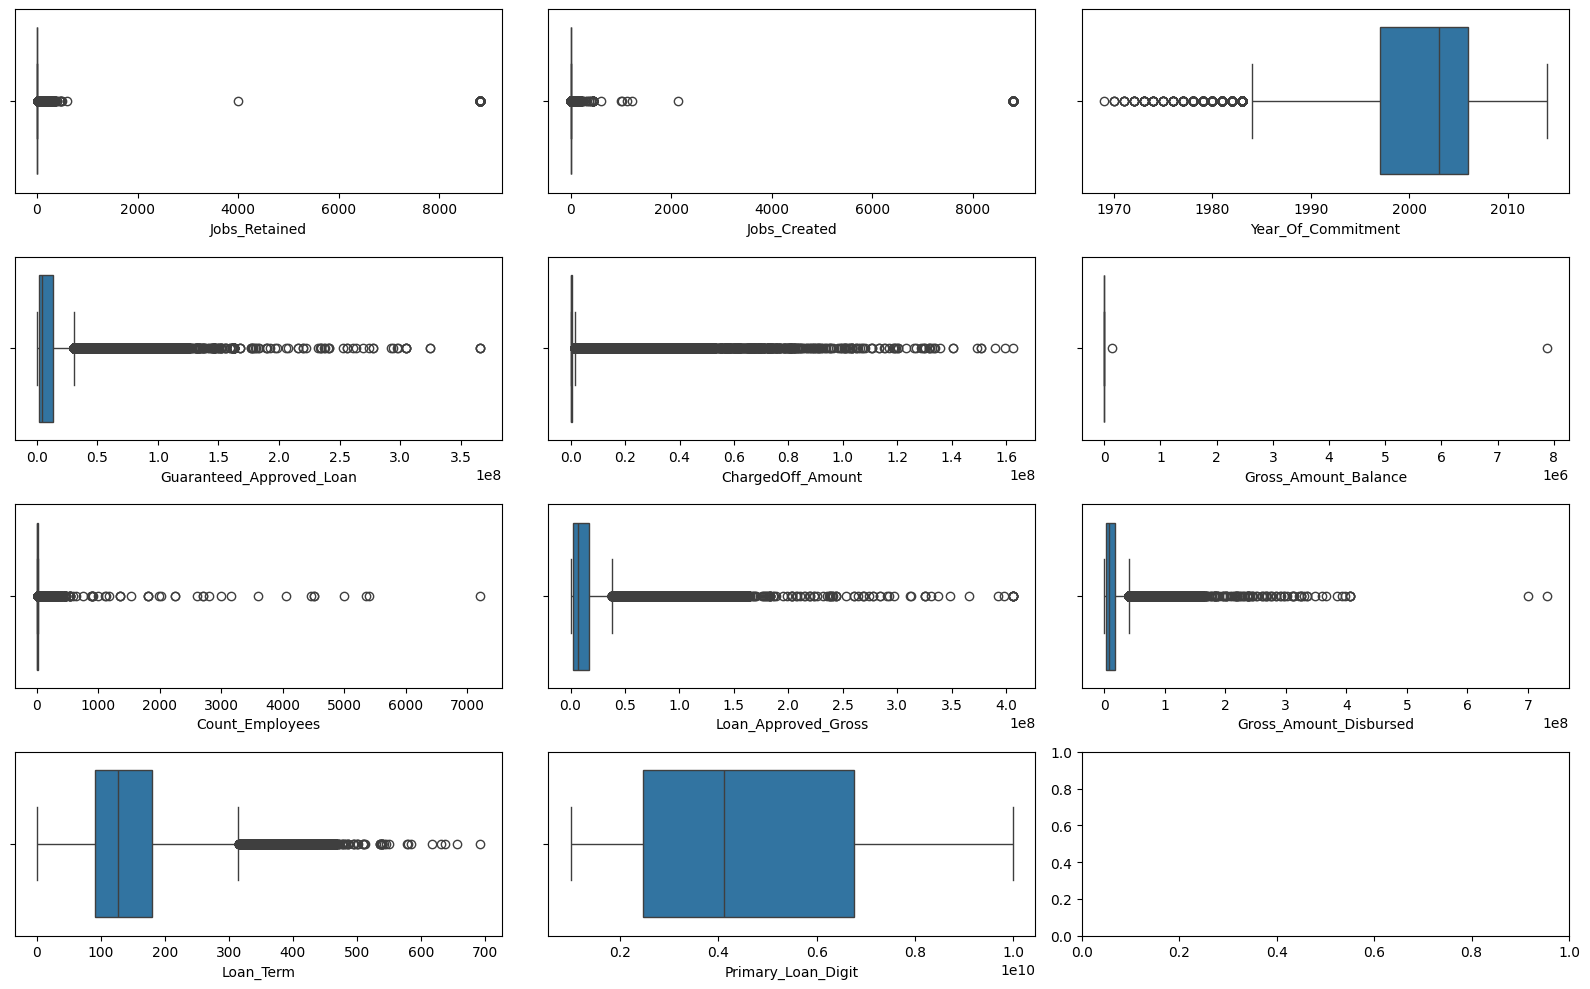

In [38]:
fig,ax = plt.subplots(4,3,figsize=(16,10))

for col,subplot in zip(df_num.columns,ax.flatten()):
    sns.boxplot(x=col,data=df,ax=subplot)
plt.tight_layout()
plt.show()

<u><b>Histogram</b></u>: (Detect skewness & visualize the distribution of the data)

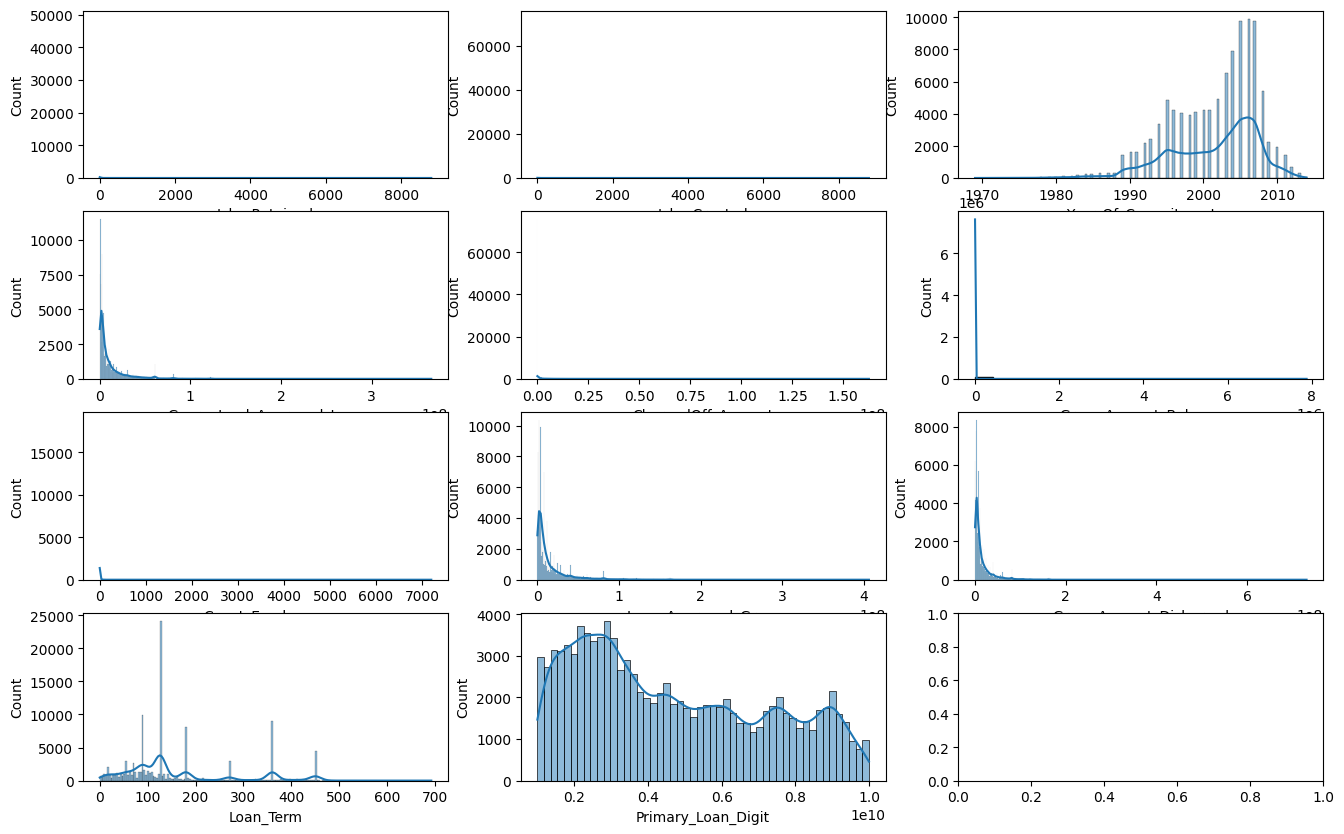

In [39]:
fig,ax = plt.subplots(4,3,figsize=(16,10))

for col,subplot in zip(df_num.columns,ax.flatten()):
    sns.histplot(x=col,data=df,kde=True,ax=subplot)
plt.show()

<b><u>Inference</u>:<b>

'Jobs_Retained'
- Distribution of data is extremely positively skewed (32.33), indicating presence of outliers the in higher scale.
- 50% of the values lie around 4
- We can observe huge no. of outliers & extreme outlier values of 4000 & 8800

'Jobs_Created'
- Distribution of data is extremely positively skewed (32.41), indicating presence of outliers in the higher scale.
- 50% of the values lie around 1
- We can observe huge no. of outliers & extreme outlier values of 2100 & 8800

'Year_Of_Commitment' 
- Distribution of data is moderately negatively skewed (-0.75), indicating presence of outliers in the lower scale. 
- 50% of the values lie around 2004
- We can observe huge no. of outliers & extreme outlier value of 1969

'Guaranteed_Approved_Loan'
- Distribution of data is extremely positively skewed (3.8), indicating presence of outliers in the higher scale.
- 50% of the values lie around 11541760
- We can observe huge no. of outliers & extreme outlier value of 365760000

'ChargedOff_Amount'
- Distribution of data is extremely positively skewed (8.9), indicating presence of outliers in the higher scale.
- 50% of the values lie around 617016 
- We can observe huge no. of outliers & extreme outlier value of 162559918.7

'Gross_Amount_Balance'
- Distribution of data is extremely positively skewed (323.8), indicating presence of outliers in the higher scale.
- Most of the values are 0 and only two other values are present (143052.8 & 7876682.2)
- We can observe a extreme value of 7876682.2

'Count_Employees'
- Distribution of data is extremely positively skewed (68), indicating presence of outliers in the higher scale.
- 50% of the values lie around 7.
- We can observe a extreme value of 7200

'Loan_Approved_Gross'
- Distribution of data is extremely positively skewed (3.7), indicating presence of outliers in the higher scale.
- 50% of the values lie around 14305280
- We can observe huge no. of outliers & extreme outlier value of 162559918.7

'Gross_Amount_Disbursed'
- Distribution of data is extremely positively skewed (4.2), indicating presence of outliers in the higher scale.
- 50% of the values lie around 14874585.4
- We can observe huge no. of outliers & extreme outlier value of 731113600

'Loan_Term'
- Distribution of data is extremely positively skewed (1.2), indicating presence of outliers in the higher scale.
- 50% of the values lie around 90
- We can observe huge no. of outliers & extreme outlier value of 692

'Primary_Loan_Digit'
- Distribution of data is near normal, no of outliers.
- 50% of the values lie around 4282320745.2
- We can't observe any outliers.
- This columns doesn't make sence as a predictor variable. 

#### Categorical variables: 

In [40]:
df_cat.columns

Index(['Business', 'Borrower_Name', 'Low_Documentation_Loan', 'Demography',
       'State_Of_Bank', 'Borrower_City', 'Borrower_State',
       'Classification_Code', 'Code_Franchise', 'Name_Of_Bank',
       'Revolving_Credit_Line', 'Default'],
      dtype='object')

In [41]:
for column in df.select_dtypes(include=object).columns: # missing value check in categorical columns
    print(df[column].value_counts(),end='\n\n')

Business
Existing    75211
New         29789
Name: count, dtype: int64

Borrower_Name
SUBWAY                            150
QUIZNO'S SUBS                      50
COLD STONE CREAMERY                42
MAIL BOXES ETC                     41
DOMINO'S PIZZA                     39
                                 ... 
WADE'S FOODS INC                    1
ATA FITNESS CENTER                  1
JOHN M & CONNE F. GRUBB.            1
ACTION CERTIFIED SIGNING AGENT      1
SOUTH MOUNTAIN FITNESS, A PART      1
Name: count, Length: 101068, dtype: int64

Low_Documentation_Loan
No     92675
Yes    12075
S         95
C         89
A         60
R          6
Name: count, dtype: int64

Demography
Urban        57598
Undefined    35099
Rural        12303
Name: count, dtype: int64

State_Of_Bank
TR    15552
GJ    10902
AS     9179
JH     7135
ML     5938
MH     5565
BR     5468
PB     4614
AR     4559
OR     3951
AP     3015
LD     2978
HP     2925
JK     2498
CH     2169
KA     2092
HR     1736
KL     1712


<b><u>Countplot</u></b>: (Visualize each of the subclasses's total count in the form of a bar chart)

- 'Business','Low_Documentation_Loan','Low_Documentation_Loan', 'Revolving_Credit_Line' , 'Default' 

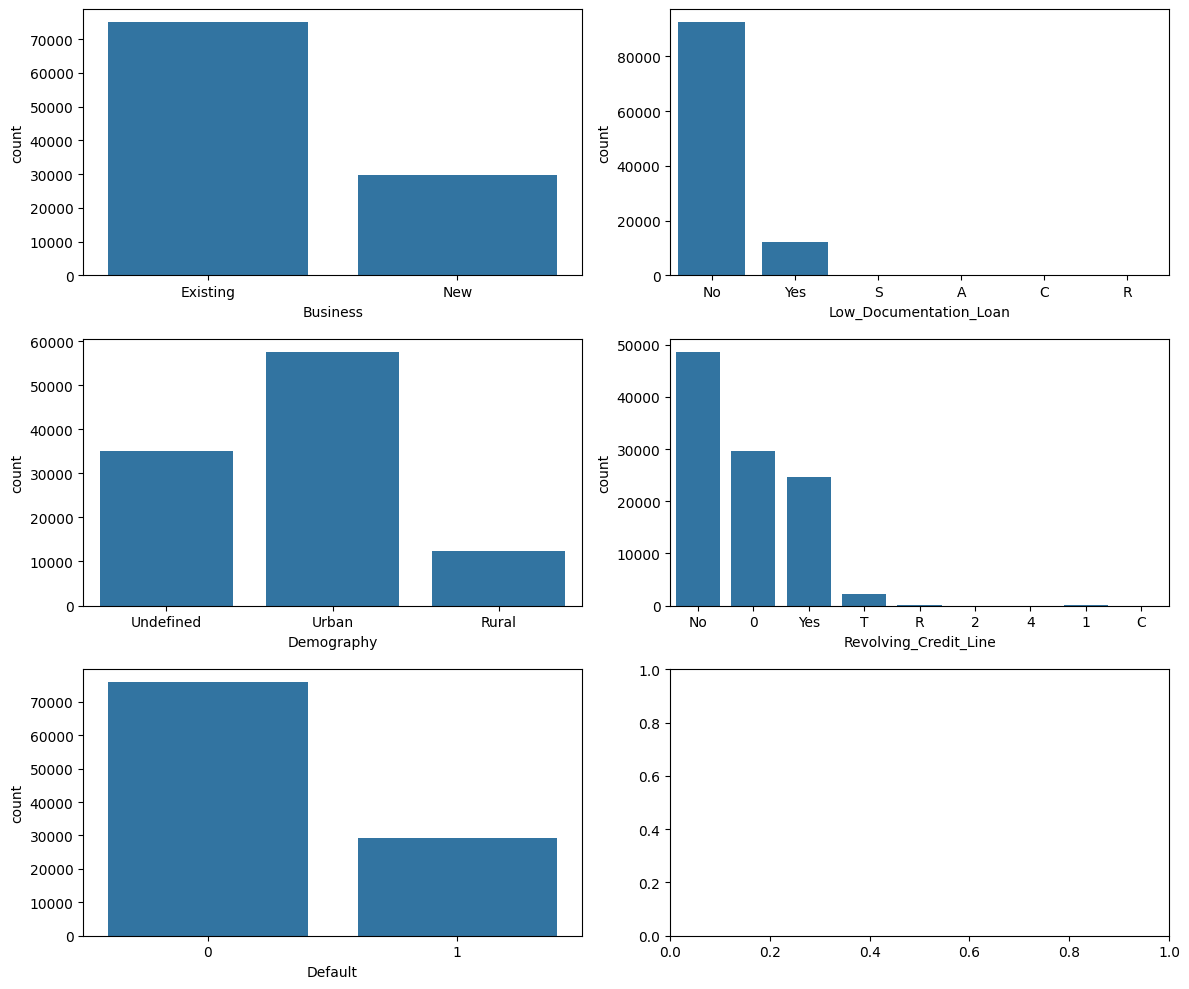

In [42]:
fig,ax = plt.subplots(3,2,figsize=(12,10))

for col,subplot in zip(['Business','Low_Documentation_Loan','Demography', 'Revolving_Credit_Line' , 'Default'],ax.flatten()):
    sns.countplot(x=col,data=df_cat,ax=subplot)
plt.tight_layout()
plt.show()

<u><b>Pieplot</b></u> - Visualize the subclasses in form of donut pie chart.

'Borrower_Name', 'State_Of_Bank', 'Borrower_City', 'Borrower_State', 'Classification_Code' , 'Code_Franchise' & 'Name_Of_Bank' have huge no. of subclasses. Hence lets visualize the top 10 subclasses.

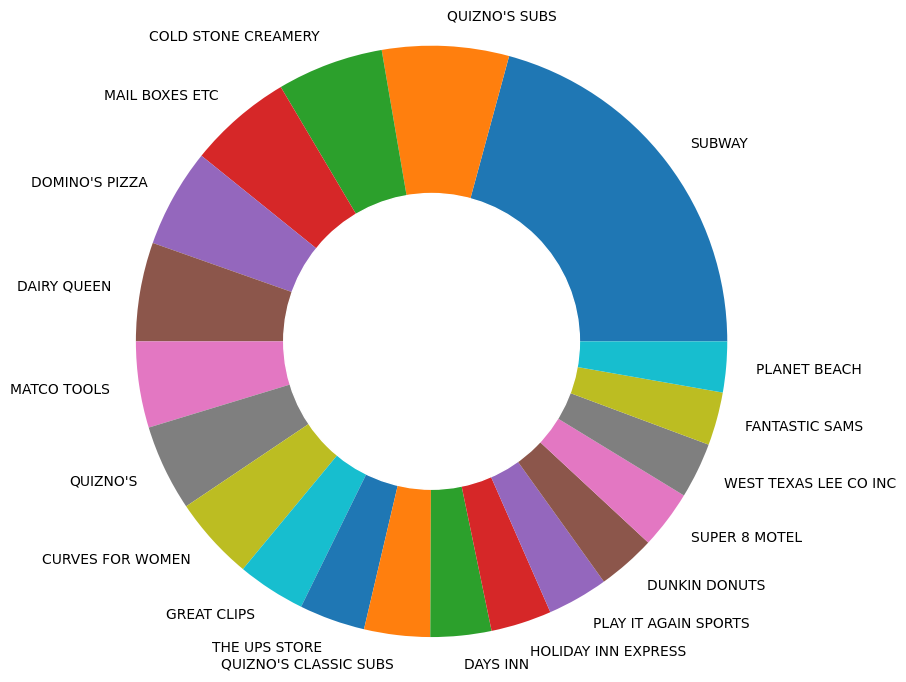

In [43]:
plt.pie(x=df_cat['Borrower_Name'].value_counts()[:20],radius=2,labels=df['Borrower_Name'].value_counts()[:20].index) # lets visualize the top 20 merchants
circle = plt.Circle((0,0),radius=1,color='white')
plot = plt.gcf()
plt.gca().add_artist(circle)
plt.show()

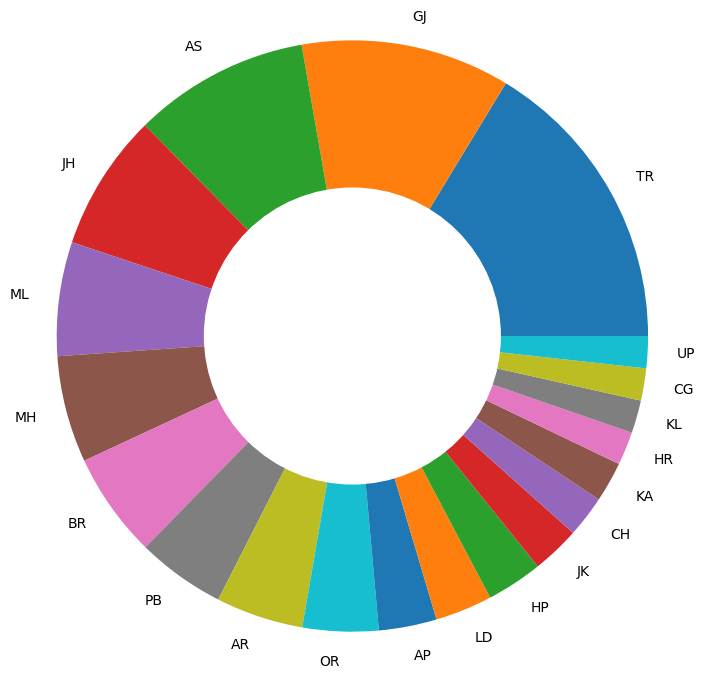

In [44]:
plt.pie(x=df_cat['State_Of_Bank'].value_counts()[:20],radius=2,labels=df['State_Of_Bank'].value_counts()[:20].index) # lets visualize the top 20 merchants
circle = plt.Circle((0,0),radius=1,color='white')
plot = plt.gcf()
plt.gca().add_artist(circle)
plt.show()

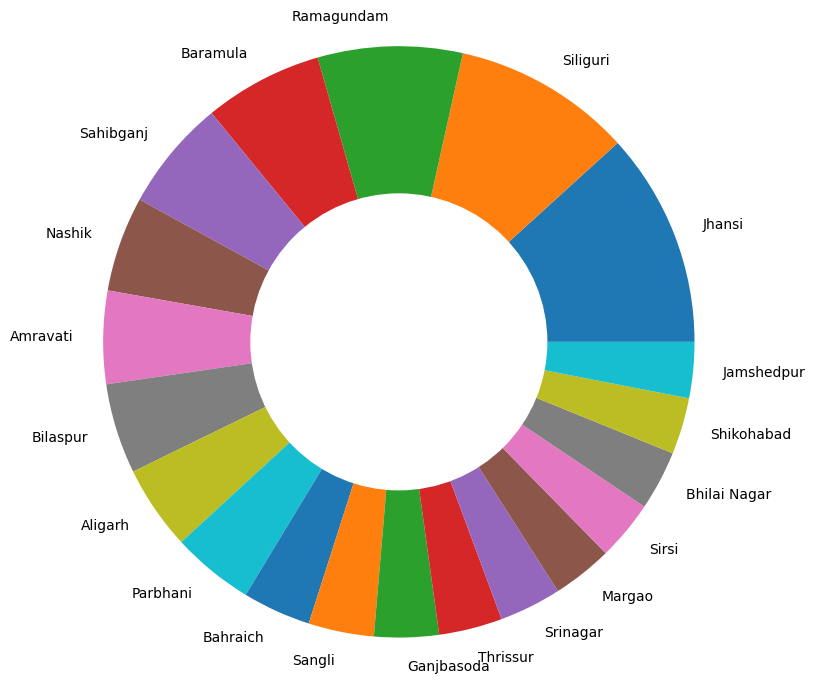

In [45]:
plt.pie(x=df_cat['Borrower_City'].value_counts()[:20],radius=2,labels=df['Borrower_City'].value_counts()[:20].index) # lets visualize the top 20 merchants
circle = plt.Circle((0,0),radius=1,color='white')
plot = plt.gcf()
plt.gca().add_artist(circle)
plt.show()

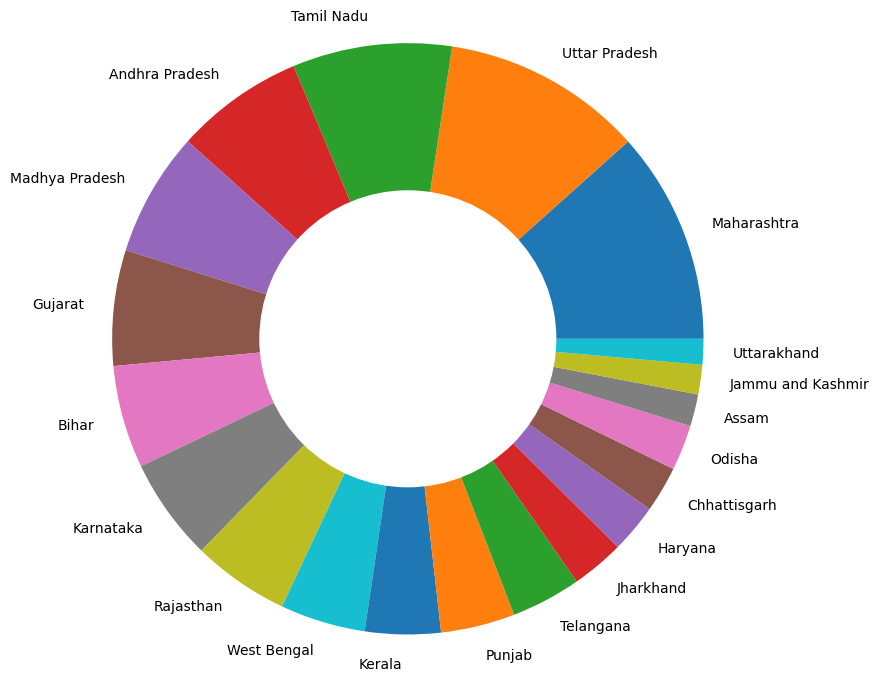

In [46]:
plt.pie(x=df_cat['Borrower_State'].value_counts()[:20],radius=2,labels=df['Borrower_State'].value_counts()[:20].index) # lets visualize the top 20 merchants
circle = plt.Circle((0,0),radius=1,color='white')
plot = plt.gcf()
plt.gca().add_artist(circle)
plt.show()

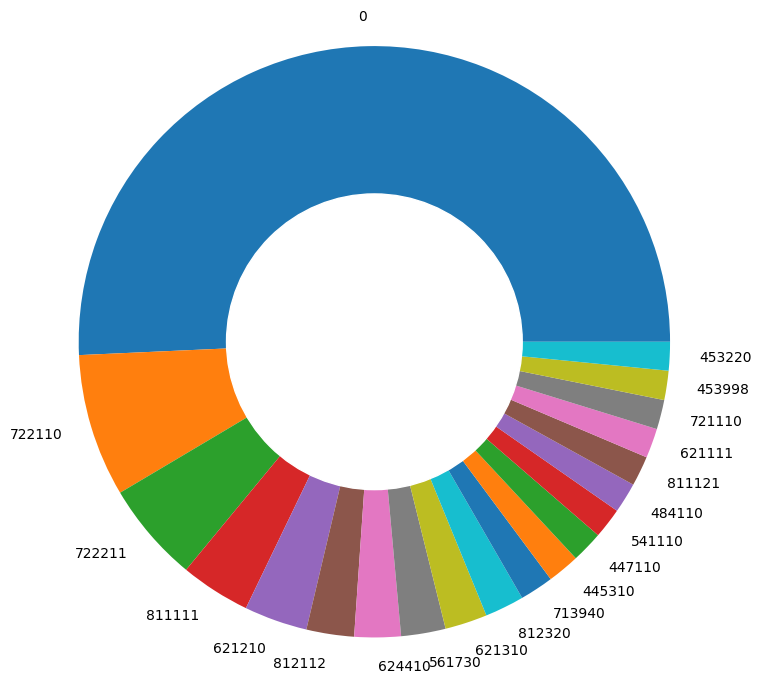

In [47]:
plt.pie(x=df_cat['Classification_Code'].value_counts()[:20],radius=2,labels=df['Classification_Code'].value_counts()[:20].index) # lets visualize the top 20 merchants
circle = plt.Circle((0,0),radius=1,color='white')
plot = plt.gcf()
plt.gca().add_artist(circle)
plt.show()

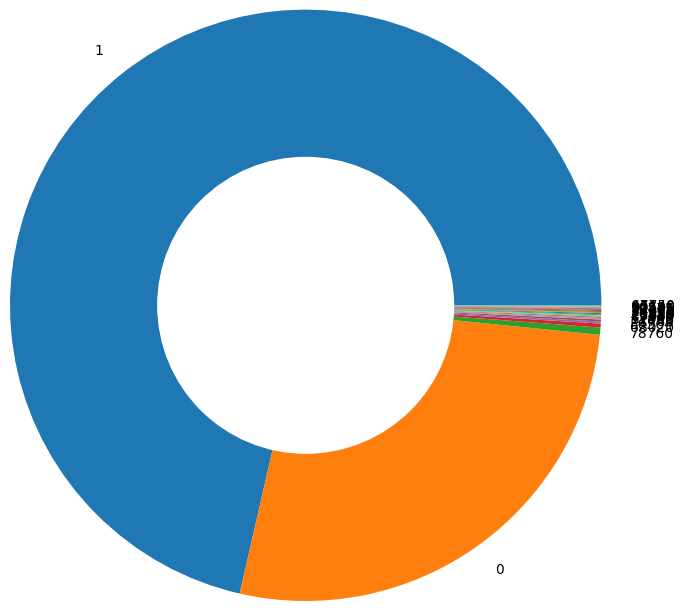

In [48]:
plt.pie(x=df_cat['Code_Franchise'].value_counts()[:20],radius=2,labels=df['Code_Franchise'].value_counts()[:20].index) # lets visualize the top 20 merchants
circle = plt.Circle((0,0),radius=1,color='white')
plot = plt.gcf()
plt.gca().add_artist(circle)
plt.show()

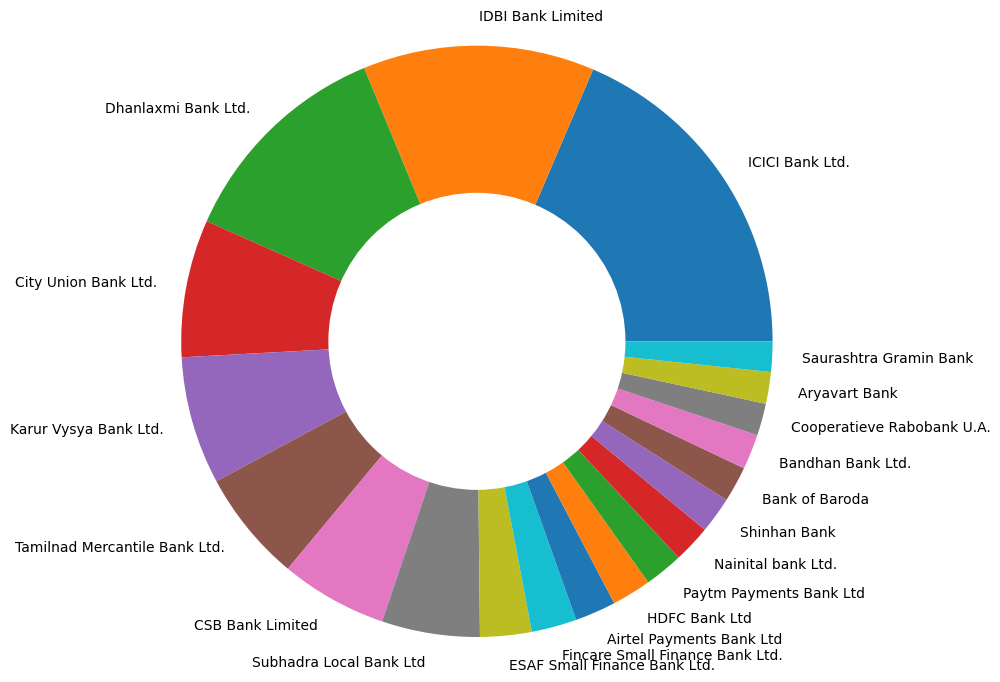

In [49]:
plt.pie(x=df_cat['Name_Of_Bank'].value_counts()[:20],radius=2,labels=df['Name_Of_Bank'].value_counts()[:20].index) # lets visualize the top 20 merchants
circle = plt.Circle((0,0),radius=1,color='white')
plot = plt.gcf()
plt.gca().add_artist(circle)
plt.show()

Inference:

'Business'<br>
- Most of the business are 'Existing' (75211)
- Least no. of business are 'New' (29789)
- There is high imbalance in subclasses, biased towards 'Existing'

'Low_Documentation_Loan'<br>
- Most of the values are 'No' (92675)
- Least no. of values are 'R' (6)
- There is high imbalance in subclasses, biased towards 'No'.

'Demography' <br>
- Most of demography is 'Urban' (57598)
- Least no. of the demography are 'Rural'
- There is high imbalance in subclasses, biased towards 'No'.

'State_Of_Bank' <br>
- Most of states belong to 'TR' (15552)
- Least no. of the values belong 'MN' (18)

'Borrower_City' 
- Most of cities belong to 'Jhansi' (1504)
- Least no. of the cities belong to 'Mudhol' (19)

'Borrower_State'
- Most of the states belong to 'Maharashtra' (11699) & 'Uttar Pradesh' (11101)
- Least no. of the cities belong to 'Bulandshahr' (34)

'Classification_Code'
-  Most of the codes belong to '0' (22209)
-  This column doesn't make sense in terms of actual predictor variable.

'Code_Franchise'
- Most of the codes belong to '1' (71874)
-  This column doesn't make sense in terms of actual predictor variable.

'Name_Of_Bank'
- Most of the banks belong to 'ICICI Bank Ltd.' (11215)
- Least no. of banks belong to 'Barclays Bank Plc.' (93)

'Revolving_Credit_Line'
- Most of the values belong to 'No' (48616)
- Least no. of values belong to '2' , '4', 'C' (1)

'Default'
- Most of the data is of '0' [75896 / 72%] (Not loan default)
- Least no. of data is of '1' [29104 / 28%] (Loan default)

### Bivariate analysis:
#### Numerical VS Categorical:

<u><b>Barplot</b></u>: Seaborn barplot gives the mean of each subclass (of the target variable) in regards to the numeric variable.

In [50]:
df_num.columns

Index(['Jobs_Retained', 'Jobs_Created', 'Year_Of_Commitment',
       'Guaranteed_Approved_Loan', 'ChargedOff_Amount', 'Gross_Amount_Balance',
       'Count_Employees', 'Loan_Approved_Gross', 'Gross_Amount_Disbursed',
       'Loan_Term', 'Primary_Loan_Digit'],
      dtype='object')

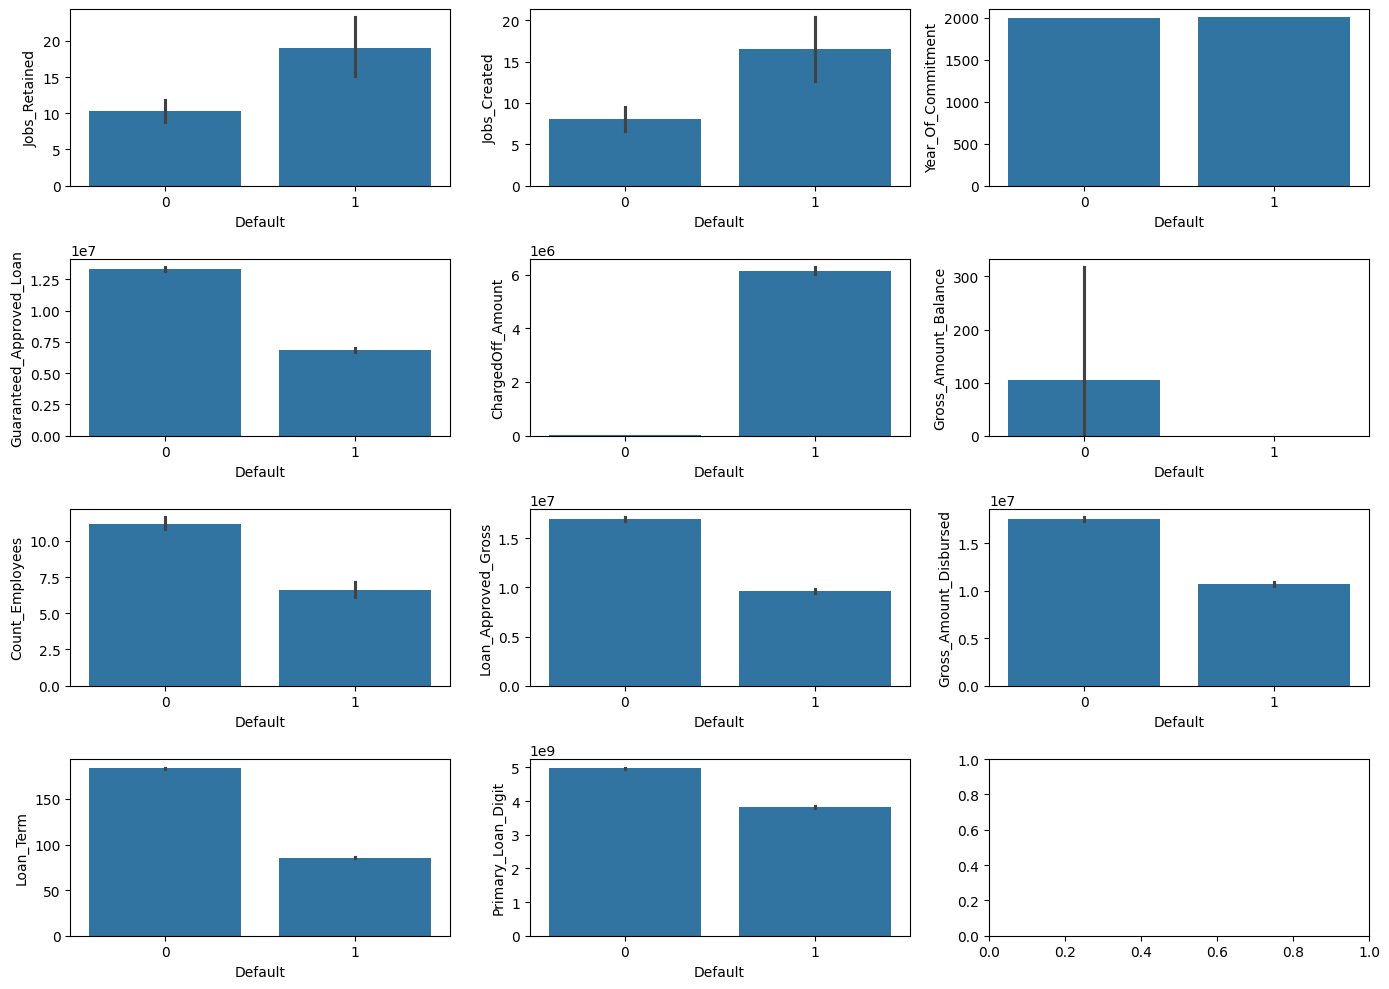

In [51]:
fig,ax = plt.subplots(4,3,figsize=(14,10))

for col,subplot in zip(df_num,ax.flatten()):
    sns.barplot(y=col,x='Default',data=df,ax=subplot)
plt.tight_layout()
plt.show()

<b><u>Boxplot</u></b>: Detect the distribution (Minimum, Maximum, 25%, 50%, 75%, outliers) of each subclass of the target variable in regards to the numeric variable.

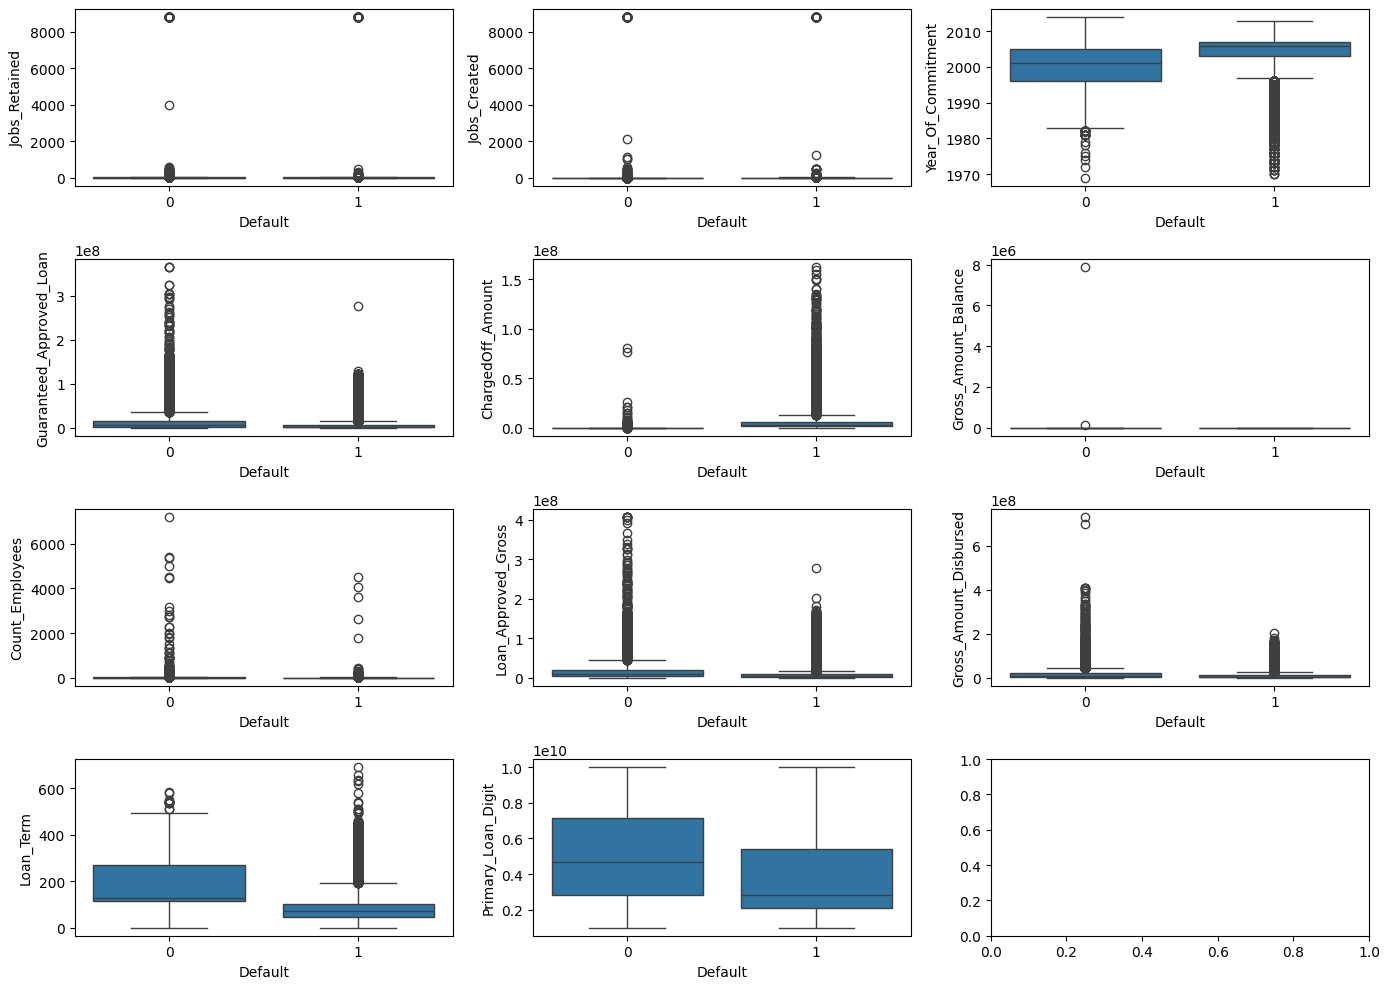

In [52]:
fig,ax = plt.subplots(4,3,figsize=(14,10))

for col,subplot in zip(df_num,ax.flatten()):
    sns.boxplot(y=col,x='Default',data=df,ax=subplot)
plt.tight_layout()
plt.show()

<b><u>Inference:</u></b>

'Jobs_Retained' VS 'Default'
- On average we can see companies(18.9) who have retained jobs have more 'Loan defaults' than companies(10.2) with 'Not loan default'
- This may be due to the company needed to payout the salary of the employees but didn't return a profit on their respective business.
- 50% of the data 'Not loan default' lies around 4 & 'Loan default' lies around 5. Similar distribution of data between the target variable subclasses.
- There seems to be relationship between these two variables.

'Jobs_Created' VS 'Default'
- On average we can see companies(16.5) who have created jobs have more 'Loan defaults' than companies(8) with 'Not loan default'
- This may be due to the company has created more jobs & is required payout the salary of the employees but didn't return a profit on their respective business
- 50% of the data 'Not loan default' lies around 1 & 'Loan default' lies around 2. Similar distribution of data between the target variable subclasses
- There seems to be relationship between these two variables.

'Year_Of_Commitment' VS 'Default'
-  Considering the average , there doesn't seem to be significant relationship between 'Year_Of_Commitment' & 'Default'.
-  50% of the data 'Not loan default' lies around  9 & 'Loan default' lies around 4

'Guaranteed_Approved_Loan' VS 'Default'
- On average we can see people who have got high 'Guaranteed_Approved_Loan' (6822169) have 'Not loan defaulted' but people with lower value (13317860) have 'Defaulted'
- 50% of the data 'Not loan default' lies around  13817600 & 'Loan default' lies around 5486400
- There seems to be relationship between these two variables.

'ChargedOff_Amount' VS 'Default'
- On average we can see people who have got high 'ChargedOff_Amount' have 'Defaulted' (6146350) & low 'ChargedOff_Amount' have 'Not defaulted'(11430.1)
- 50% of the data 'Not loan default' lies around 0 & 'Loan default' lies around 4797592.6
- There seems to be relationship between these two variables.

'Gross_Amount_Balance' VS 'Default'
- On average we can see people with high 'Gross_Amount_Balance' have 'Not defaulted' (105.6) & people with low 'Gross_Amount_Balance' have 'Defaulted' (6.5)
- There seems to be relationship between these two variables.

'Count_Employees'  VS 'Default'
- On average we can see companies with more employees have 'Not defaulted' (11.1) while companies with low no. of employees have 'Defaulted' (6.5)
- 50% of the data 'Not loan default' lies around 8 & 'Loan default' lies around 4
- There seems to be relationship between these two variables.

'Loan_Approved_Gross'  VS 'Default'
- On average we can see companies who got high 'Loan_Approved_Gross' have 'Not defaulted' (16954400) compared to people with low 'Loan_Approved_Gross' who have defaulted (9622007).
- 50% of the data 'Not loan default' lies around 17068800 & 'Loan default' lies around 6096000
- There seems to be relationship between these two variables.

'Gross_Amount_Disbursed' VS 'Default'
- On average people with high 'Gross_Amount_Disbursed' have 'Not defaulted' (17536700) while people with 'Gross_Amount_Disbursed' have 'Defaulted' (10689470)
- 50% of the data 'Not loan default' lies around 16662400 & 'Loan default' lies around 9207093.6
- There seems to be relationship between these two variables.

'Loan_Term' VS 'Default'
- On average people with high 'Loan_Term' have not defaulted (183.5) while people with low 'Loan_Term' have 'Defaulted' (85.6)
- 50% of the data 'Not loan default' lies around 153 & 'Loan default' lies around 59.

'Primary_Loan_Digit' VS 'Default'
- This column can be just a unique identifier that we may consider discarding that might not be a good predictor variable.

#### Categorical VS Categorical

<b><u>Crosstab</u></b>:

<Figure size 1000x800 with 0 Axes>

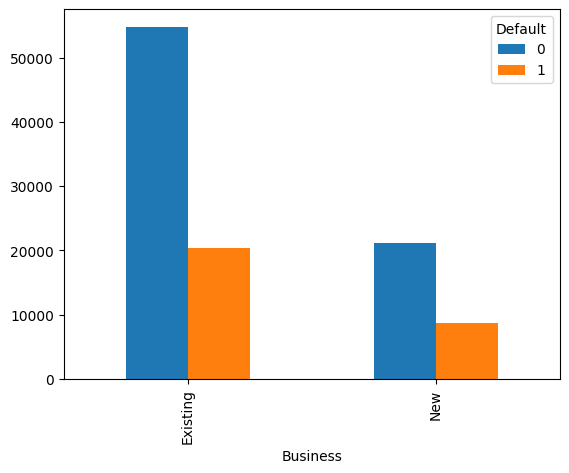

<Figure size 1000x800 with 0 Axes>

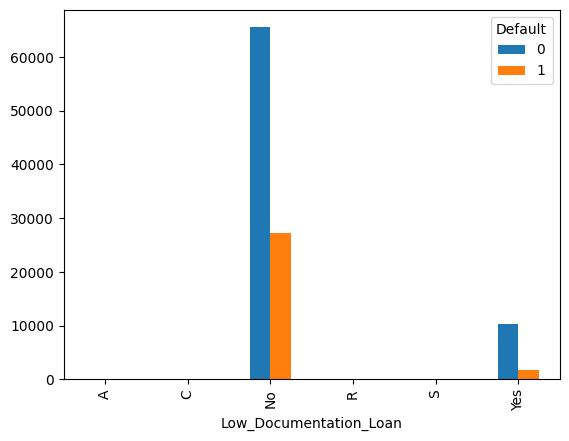

<Figure size 1000x800 with 0 Axes>

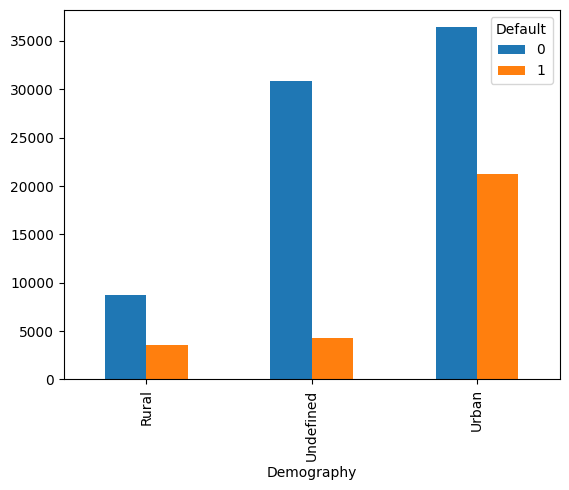

<Figure size 1000x800 with 0 Axes>

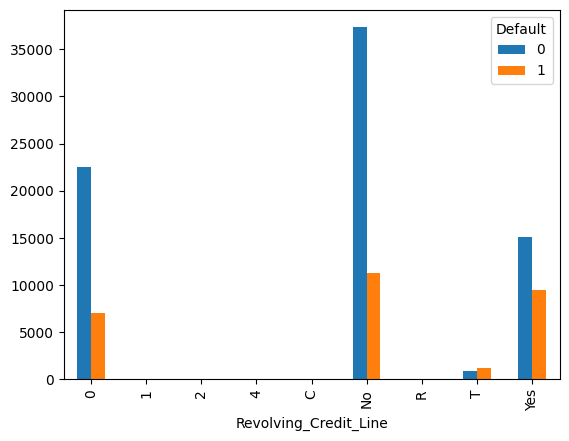

<Figure size 1000x800 with 0 Axes>

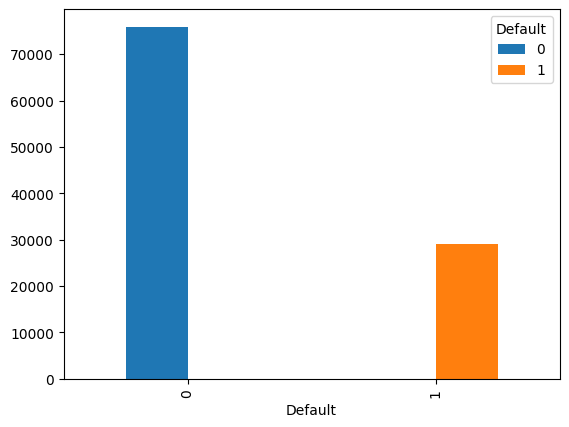

In [53]:
for col in ['Business','Low_Documentation_Loan','Demography', 'Revolving_Credit_Line' , 'Default']:
    plt.figure(figsize=(10,8))
    pd.crosstab(df[col],df['Default']).plot(kind='bar')
    plt.show()

Inference:

'Business' VS 'Default':
- We can see most of the existing 'Business' (20386) have 'Defaulted' compared to the 'New' business who have less 'Defaults' (8718)
- There seems to be a relationship between the two variables.

'Low_Documentation_Loan' VS 'Default':
- We can see most of the companies who "Don't" have 'Low_Documentation' have 'Defaults' (27191).
- We can also see considerable no. of companies 'Have' 'Low_Documentation' have 'Defaults' (1803).
- There seems to be a relationship between the two variables.

'Demography' VS 'Default':
- We can see most of the 'Urban' (21223) companies have 'Defaults' compared to the 'Rural' (3613) companies.


'Revolving_Credit_Line' VS 'Default' :
- We can see most of the companies who 'Dont have' a 'Revolving_Credit_Line' have the highest no. of default (11312) followed by companies who 'Have a' 'Revolving_Credit_Line'
(9495).
- Third place is held by '0' subclass (7055)


### Multivariate analysis:
<b>Numeric VS Numeric VS Numeric</b><br>
<b><u>Corellation matirx:</u></b>

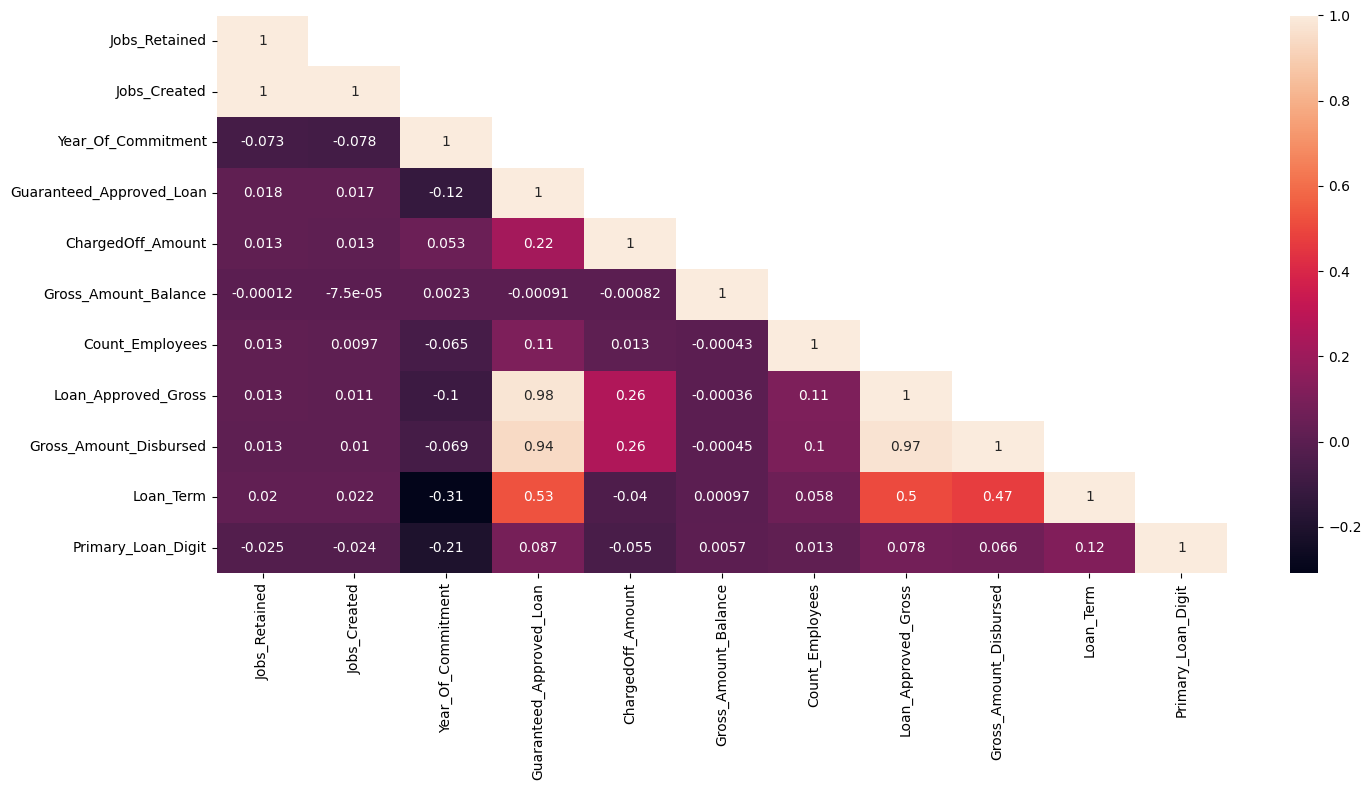

In [55]:
plt.figure(figsize=(15,8))
sns.heatmap(df_num.corr(),annot=True,mask=np.triu(df_num.corr(),k=1))
plt.tight_layout()
plt.show()

<b>Inference:</b>
We can infer the presence of Multi-collinearity(existence of correlation between the independent / 'x' variables) from the above plot.

We can observe high positive correlation between:
- 'Loan_Approved_Gross' & 'Guaranteed_Approved_Loan' (0.98)
- 'Gross_Amount_Disbursed' &  'Guaranteed_Approved_Loan' (0.94)

We can observe moderate positive correlation between:
- 'Loan_Term' & 'Guaranteed_Approved_Loan' (0.53)
- 'Loan_Term' & 'Loan_Approved_Gross' (0.5)
-  'Loan_Term' & 'Gross_Amount_Disbursed' (0.47)

We can observe weak positive correlation between:
- 'Loan_Approved_Gross' & 'Charged_off_Amount' (0.26)
- 'Gross_Amount_Disbursed' & 'Charged_off_Amount' (0.26)

We can observe weak negative correlation between:
- 'Loan_Term' & 'Year of commitment' (-0.31)
- 'Primary_Loan_Digit' & 'Year of commitment' (-0.21)

<hr>

<br>

### Statistical tests of significance (to find if any relationship exists between the 'x' variables and 'y' variable):

<b>Parametric test conditions:</b><br>
i) <u>Data normality</u>
- Shapiro test:

In [56]:
for column in df_num.columns:
    print(column)
    print(stats.shapiro(df_num[column]),end='\n\n')

Jobs_Retained
ShapiroResult(statistic=0.0169488787651062, pvalue=0.0)

Jobs_Created
ShapiroResult(statistic=0.014041244983673096, pvalue=0.0)

Year_Of_Commitment
ShapiroResult(statistic=0.9487205147743225, pvalue=0.0)

Guaranteed_Approved_Loan
ShapiroResult(statistic=0.6074019074440002, pvalue=0.0)

ChargedOff_Amount
ShapiroResult(statistic=0.26892179250717163, pvalue=0.0)

Gross_Amount_Balance
ShapiroResult(statistic=0.00020831823348999023, pvalue=0.0)

Count_Employees
ShapiroResult(statistic=0.06530773639678955, pvalue=0.0)

Loan_Approved_Gross
ShapiroResult(statistic=0.6094439625740051, pvalue=0.0)

Gross_Amount_Disbursed
ShapiroResult(statistic=0.6111739873886108, pvalue=0.0)

Loan_Term
ShapiroResult(statistic=0.838178277015686, pvalue=0.0)

Primary_Loan_Digit
ShapiroResult(statistic=0.9326492547988892, pvalue=0.0)



<b><u>Inference</b></u>: We can observe the numeric columns don't follow normality.

ii) Data has equal variance:
- Levene test

In [58]:
stats.levene(df['Jobs_Retained'],df['Jobs_Created'],df['Year_Of_Commitment'],df['Guaranteed_Approved_Loan'],df['ChargedOff_Amount'],df['Gross_Amount_Balance'],df['Count_Employees'],df['Loan_Approved_Gross'],df['Gross_Amount_Disbursed'],df['Loan_Term'],df['Primary_Loan_Digit'])

LeveneResult(statistic=240470.79189319717, pvalue=0.0)

<b><u>Inference</b></u>:
- We can observe the numeric columns don't lack equal variance.

 Since the data doesn't follow normality and doesn't have equal variance we have opted for non-parametric tests. (Manwhitneyu)

<hr>

### Statistical tests of significance 
### i) Numeric variables

In [60]:
df_num.columns

Index(['Jobs_Retained', 'Jobs_Created', 'Year_Of_Commitment',
       'Guaranteed_Approved_Loan', 'ChargedOff_Amount', 'Gross_Amount_Balance',
       'Count_Employees', 'Loan_Approved_Gross', 'Gross_Amount_Disbursed',
       'Loan_Term', 'Primary_Loan_Digit'],
      dtype='object')

<b>Mannwhitneyu test</b>

- 'Jobs_Retained'

In [61]:
stats.mannwhitneyu(df['Jobs_Retained'].loc[df['Default']==1],df['Jobs_Retained'].loc[df['Default']==0])
# Since pvalue<0.05,  there exists a relation between 'Jobs_Retained' & 'Default'.

MannwhitneyuResult(statistic=1347747562.0, pvalue=0.0)

- 'Jobs_Created'

In [62]:
stats.mannwhitneyu(df['Jobs_Created'].loc[df['Default']==1],df['Jobs_Created'].loc[df['Default']==0])
# Since pvalue<0.05,  there exists a relation between 'Jobs_Created' & 'Default'.

MannwhitneyuResult(statistic=1171875562.0, pvalue=4.91981762250855e-78)

- 'Year_Of_Commitment'

In [63]:
stats.mannwhitneyu(df['Year_Of_Commitment'].loc[df['Default']==1],df['Year_Of_Commitment'].loc[df['Default']==0])
# Since pvalue<0.05,  there exists a relation between 'Year_Of_Commitment' & 'Default'. 
# We will probably drop the year column as a Year of Commitment directly can't be a predictor variable

MannwhitneyuResult(statistic=1526371454.0, pvalue=0.0)

- 'Guaranteed_Approved_Loan'

In [64]:
stats.mannwhitneyu(df['Guaranteed_Approved_Loan'].loc[df['Default']==1],df['Guaranteed_Approved_Loan'].loc[df['Default']==0])
# Since pvalue<0.05,  there exists a relation between 'Guaranteed_Approved_Loan' & 'Default'.

MannwhitneyuResult(statistic=750193379.0, pvalue=0.0)

- 'ChargedOff_Amount'

In [65]:
stats.mannwhitneyu(df['ChargedOff_Amount'].loc[df['Default']==1],df['ChargedOff_Amount'].loc[df['Default']==0])
# Since pvalue<0.05,  there exists a relation between 'ChargedOff_Amount' & 'Default'.

MannwhitneyuResult(statistic=2201053456.0, pvalue=0.0)

- 'Gross_Amount_Balance'

In [66]:
stats.mannwhitneyu(df['Gross_Amount_Balance'].loc[df['Default']==1],df['Gross_Amount_Balance'].loc[df['Default']==0])
# Since pvalue>0.05,  there doesn't seem to be a relation between 'Gross_Amount_Balance' & 'Default'.
# This seems to be true since we only have two other values other than 0 (most values have 0 as their value)

MannwhitneyuResult(statistic=1104409488.0, pvalue=0.38116995282032695)

- 'Count_Employees'

In [67]:
stats.mannwhitneyu(df['Count_Employees'].loc[df['Default']==1],df['Count_Employees'].loc[df['Default']==0])
# Since pvalue<0.05,  there seems to be a relation between 'Count_Employees' & 'Default'.

MannwhitneyuResult(statistic=907859239.0, pvalue=0.0)

- 'Loan_Approved_Gross'

In [68]:
stats.mannwhitneyu(df['Loan_Approved_Gross'].loc[df['Default']==1],df['Loan_Approved_Gross'].loc[df['Default']==0])
# Since pvalue<0.05,  there seems to be a relation between 'Loan_Approved_Gross' & 'Default'.

MannwhitneyuResult(statistic=778599866.5, pvalue=0.0)

- 'Gross_Amount_Disbursed'

In [69]:
stats.mannwhitneyu(df['Gross_Amount_Disbursed'].loc[df['Default']==1],df['Gross_Amount_Disbursed'].loc[df['Default']==0])
# Since pvalue<0.05,  there seems to be a relation between 'Gross_Amount_Disbursed' & 'Default'.

MannwhitneyuResult(statistic=836315085.5, pvalue=0.0)

- 'Loan_Term'

In [70]:
stats.mannwhitneyu(df['Loan_Term'].loc[df['Default']==1],df['Loan_Term'].loc[df['Default']==0])
# Since pvalue<0.05,  there seems to be a relation between 'Loan_Term' & 'Default'.

MannwhitneyuResult(statistic=422128193.5, pvalue=0.0)

- 'Primary_Loan_Digit'

In [71]:
stats.mannwhitneyu(df['Primary_Loan_Digit'].loc[df['Default']==1],df['Primary_Loan_Digit'].loc[df['Default']==0])
# Since pvalue<0.05, there seems to be a relation between 'Primary_Loan_Digit' & 'Default'.
# We will probably drop this column as it seems to be a unique identifier assigned to a loan taken rather than a actual predictor variable

MannwhitneyuResult(statistic=796563756.0, pvalue=0.0)

### ii) Categorical variables

<b>ChiSquare contingency test:</b>

In [72]:
df_cat.columns

Index(['Business', 'Borrower_Name', 'Low_Documentation_Loan', 'Demography',
       'State_Of_Bank', 'Borrower_City', 'Borrower_State',
       'Classification_Code', 'Code_Franchise', 'Name_Of_Bank',
       'Revolving_Credit_Line', 'Default'],
      dtype='object')

- 'Business'

In [73]:
stats.chi2_contingency(pd.crosstab(df['Business'],df['Default']))
# Since pvalue<0.05, there is a relation between 'Business' & 'Default' 

Chi2ContingencyResult(statistic=49.616380455243146, pvalue=1.8694630929905702e-12, dof=1, expected_freq=array([[54363.94339048, 20847.05660952],
       [21532.05660952,  8256.94339048]]))

- 'Borrower_Name'

In [74]:
stats.chi2_contingency(pd.crosstab(df['Borrower_Name'],df['Default']))
# Since pvalue<0.05, there is a relation between 'Borrower_Name' & 'Default' 

Chi2ContingencyResult(statistic=102666.97594796162, pvalue=0.00019885944975489702, dof=101067, expected_freq=array([[0.72281905, 0.27718095],
       [0.72281905, 0.27718095],
       [0.72281905, 0.27718095],
       ...,
       [0.72281905, 0.27718095],
       [0.72281905, 0.27718095],
       [0.72281905, 0.27718095]]))

- 'Low_Documentation_Loan'

In [75]:
stats.chi2_contingency(pd.crosstab(df['Low_Documentation_Loan'],df['Default']))
# Since pvalue<0.05, there is a relation between 'Borrower_Name' & 'Default' 

Chi2ContingencyResult(statistic=1183.9636663129786, pvalue=8.739424177882087e-254, dof=5, expected_freq=array([[4.33691429e+01, 1.66308571e+01],
       [6.43308952e+01, 2.46691048e+01],
       [6.69872552e+04, 2.56877448e+04],
       [4.33691429e+00, 1.66308571e+00],
       [6.86678095e+01, 2.63321905e+01],
       [8.72804000e+03, 3.34696000e+03]]))

- 'Demography'

In [76]:
stats.chi2_contingency(pd.crosstab(df['Demography'],df['Default']))
# Since pvalue<0.05, there is a relation between 'Borrower_Name' & 'Default' 

Chi2ContingencyResult(statistic=6652.911703712958, pvalue=0.0, dof=2, expected_freq=array([[ 8892.84274286,  3410.15725714],
       [25370.22575238,  9728.77424762],
       [41632.93150476, 15965.06849524]]))

- 'State_Of_Bank'

In [77]:
stats.chi2_contingency(pd.crosstab(df['State_Of_Bank'],df['Default']))
# Since pvalue<0.05, there is a relation between 'Borrower_Name' & 'Default' 

Chi2ContingencyResult(statistic=4890.34869439659, pvalue=0.0, dof=33, expected_freq=array([[3.03584000e+02, 1.16416000e+02],
       [2.17929943e+03, 8.35700571e+02],
       [3.29533204e+03, 1.26366796e+03],
       [6.63475604e+03, 2.54424396e+03],
       [3.95237455e+03, 1.51562545e+03],
       [1.21289036e+03, 4.65109638e+02],
       [1.56779451e+03, 6.01205486e+02],
       [3.33942400e+02, 1.28057600e+02],
       [4.21403505e+02, 1.61596495e+02],
       [5.81146514e+02, 2.22853486e+02],
       [1.00110438e+03, 3.83895619e+02],
       [7.88017326e+03, 3.02182674e+03],
       [2.11424571e+03, 8.10754286e+02],
       [1.25481387e+03, 4.81186133e+02],
       [5.15731390e+03, 1.97768610e+03],
       [1.80560198e+03, 6.92398019e+02],
       [1.51213745e+03, 5.79862552e+02],
       [1.23746621e+03, 4.74533790e+02],
       [2.15255512e+03, 8.25444876e+02],
       [4.02248800e+03, 1.54251200e+03],
       [4.29209950e+03, 1.64590050e+03],
       [1.30107429e+01, 4.98925714e+00],
       [7.3582

- 'Borrower_City'

In [78]:
stats.chi2_contingency(pd.crosstab(df['Borrower_City'],df['Default']))
# Since pvalue<0.05, there is a relation between 'Borrower_Name' & 'Default' 

Chi2ContingencyResult(statistic=2768.1053045388553, pvalue=8.398873453035856e-127, dof=1192, expected_freq=array([[39.75504762, 15.24495238],
       [57.10270476, 21.89729524],
       [41.92350476, 16.07649524],
       ...,
       [66.49935238, 25.50064762],
       [70.83626667, 27.16373333],
       [31.08121905, 11.91878095]]))

- 'Borrower_State'

In [79]:
stats.chi2_contingency(pd.crosstab(df['Borrower_State'],df['Default']))
# Since pvalue<0.05, there is a relation between 'Borrower_Name' & 'Default' 

Chi2ContingencyResult(statistic=146.36593364672723, pvalue=2.4533845648351897e-14, dof=39, expected_freq=array([[  34.69531429,   13.30468571],
       [  48.42887619,   18.57112381],
       [  28.18994286,   10.81005714],
       [5145.7488    , 1973.2512    ],
       [  51.32015238,   19.67984762],
       [1277.22125714,  489.77874286],
       [4108.50346667, 1575.49653333],
       [  24.57584762,    9.42415238],
       [  66.49935238,   25.50064762],
       [1831.62346667,  702.37653333],
       [  26.74430476,   10.25569524],
       [ 259.4920381 ,   99.5079619 ],
       [  46.26041905,   17.73958095],
       [ 500.19078095,  191.80921905],
       [4615.9224381 , 1770.0775619 ],
       [  29.63558095,   11.36441905],
       [1950.16579048,  747.83420952],
       [ 224.79672381,   86.20327619],
       [1179.64068571,  452.35931429],
       [2114.24571429,  810.75428571],
       [4099.8296381 , 1572.1703619 ],
       [  28.9127619 ,   11.0872381 ],
       [3018.49234286, 1157.50765714]

- 'Classification_Code'

In [80]:
stats.chi2_contingency(pd.crosstab(df['Classification_Code'],df['Default']))
# Since pvalue<0.05, there is a relation between 'Borrower_Name' & 'Default' 

Chi2ContingencyResult(statistic=10532.570156270933, pvalue=0.0, dof=1198, expected_freq=array([[1.60530882e+04, 6.15591177e+03],
       [1.44563810e+00, 5.54361905e-01],
       [1.01194667e+01, 3.88053333e+00],
       ...,
       [7.22819048e-01, 2.77180952e-01],
       [7.22819048e-01, 2.77180952e-01],
       [2.89127619e+00, 1.10872381e+00]]))

- 'Code_Franchise'

In [81]:
stats.chi2_contingency(pd.crosstab(df['Code_Franchise'],df['Default']))
# Since pvalue<0.05, there is a relation between 'Borrower_Name' & 'Default' 

Chi2ContingencyResult(statistic=9659.777917491729, pvalue=0.0, dof=1211, expected_freq=array([[1.96346566e+04, 7.52934339e+03],
       [5.19518962e+04, 1.99221038e+04],
       [2.16845714e+00, 8.31542857e-01],
       ...,
       [7.22819048e-01, 2.77180952e-01],
       [2.16845714e+00, 8.31542857e-01],
       [7.22819048e-01, 2.77180952e-01]]))

- 'Name_Of_Bank'

In [82]:
stats.chi2_contingency(pd.crosstab(df['Name_Of_Bank'],df['Default']))
# Since pvalue<0.05, there is a relation between 'Borrower_Name' & 'Default' 

Chi2ContingencyResult(statistic=10013.470931687134, pvalue=0.0, dof=142, expected_freq=array([[ 126.49333333,   48.50666667],
       [ 138.0584381 ,   52.9415619 ],
       [ 977.25135238,  374.74864762],
       [ 182.87321905,   70.12678095],
       [ 704.02575238,  269.97424762],
       [ 228.41081905,   87.58918095],
       [ 136.6128    ,   52.3872    ],
       [ 757.5143619 ,  290.4856381 ],
       [ 245.75847619,   94.24152381],
       [ 370.80617143,  142.19382857],
       [ 276.83969524,  106.16030476],
       [ 305.75245714,  117.24754286],
       [ 194.43832381,   74.56167619],
       [ 839.19291429,  321.80708571],
       [ 325.99139048,  125.00860952],
       [ 116.37386667,   44.62613333],
       [ 258.76921905,   99.23078095],
       [ 850.0352    ,  325.9648    ],
       [ 285.51352381,  109.48647619],
       [ 558.01630476,  213.98369524],
       [ 335.3880381 ,  128.6119619 ],
       [ 208.17188571,   79.82811429],
       [  67.22217143,   25.77782857],
       [ 503.082

- 'Revolving_Credit_Line'

In [83]:
stats.chi2_contingency(pd.crosstab(df['Revolving_Credit_Line'],df['Default']))
# Since pvalue<0.05, there is a relation between 'Borrower_Name' & 'Default' 

Chi2ContingencyResult(statistic=3149.4374901007413, pvalue=0.0, dof=8, expected_freq=array([[2.14041176e+04, 8.20788236e+03],
       [1.44563810e+00, 5.54361905e-01],
       [7.22819048e-01, 2.77180952e-01],
       [7.22819048e-01, 2.77180952e-01],
       [7.22819048e-01, 2.77180952e-01],
       [3.51405708e+04, 1.34754292e+04],
       [2.89127619e+00, 1.10872381e+00],
       [1.53237638e+03, 5.87623619e+02],
       [1.78124298e+04, 6.83057021e+03]]))

<b><u>Inference</u></b>:

Statistically significant numeric columns:
- 'Jobs_Retained'
- 'Jobs_Created'
- 'Guaranteed_Approved_Loan'
- 'ChargedOff_Amount'
- 'Count_Employees'
- 'Loan_Approved_Gross'
- 'Gross_Amount_Disbursed'
-  'Loan_Term'

Statistically significant categorical columns:
- 'Business'
- 'Low_Documentation_Loan'
- 'Demography'
- 'Revolving credit line'

- 'Borrower_Name', 'Name_Of_Bank' doesn't seem to be a good predictor considering it is just the name of the bank & the company.
- 'Borrower_City', 'Borrower_State' are just the name of the location where the borrower resides in.
- 'Classification_Code' & 'Code_Franchise' may just be a unique identifier assigned to a loan.

<hr>

## Encoding:

In [87]:
df_cat

,Business,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,Borrower_City,Borrower_State,Classification_Code,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
0,Existing,STANDARD PARTS CORPORATION,No,Undefined,AP,Mumbai,Maharashtra,0,1,Axis Bank Ltd.,No,0
1,New,FRANK & KERI AMESTOY,No,Urban,TR,Delhi,Delhi,451120,1,Bandhan Bank Ltd.,0,1
2,Existing,TELECOMMQC L L C,No,Urban,AS,Bengaluru,Karnataka,541618,1,CSB Bank Limited,Yes,0
3,New,"K & A AUTOMOTIVE, INC. DBA MUF",No,Urban,BR,Ahmedabad,Gujarat,811112,0,City Union Bank Ltd.,Yes,0
4,Existing,SUNBEAM DELI,No,Urban,TR,Hyderabad,Telangana,722211,1,DCB Bank Ltd.,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
104995,New,PURPOSE PUBLISHING,Yes,Undefined,GJ,Motipur,Bihar,541430,1,Capital Small Finance Bank Ltd,0,0
104996,New,NANA BEAR'S QUILTS,Yes,Rural,CG,Warisaliganj,Bihar,451130,1,Airtel Payments Bank Ltd,0,0
104997,New,Pho 777,No,Urban,JH,Nakodar,Punjab,722110,0,Karur Vysya Bank Ltd.,No,1
104998,Existing,FLEX TEMP CORPORATION dba LABO,No,Urban,TR,Nasirabad,Rajasthan,561310,1,Central Bank of India,0,0


In [88]:
le = LabelEncoder()
df_cat_encoded = df_cat[['Business','Low_Documentation_Loan','Demography','Revolving_Credit_Line']].apply(le.fit_transform)
df_cat_encoded

,Business,Low_Documentation_Loan,Demography,Revolving_Credit_Line
0,0,2,1,5
1,1,2,2,0
2,0,2,2,8
3,1,2,2,8
4,0,2,2,0
...,...,...,...,...
104995,1,5,1,0
104996,1,5,0,0
104997,1,2,2,5
104998,0,2,2,0


In [89]:
df_num_final =  df_num[['Jobs_Retained','Jobs_Created','Guaranteed_Approved_Loan','ChargedOff_Amount','Count_Employees','Loan_Approved_Gross','Gross_Amount_Disbursed','Loan_Term']]
df_num_final

,Jobs_Retained,Jobs_Created,Guaranteed_Approved_Loan,ChargedOff_Amount,Count_Employees,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term
0,0,0,33121600.0,0.00,38,40640000.0,40640000.00,126
1,0,6,32735520.0,38283367.68,6,43647360.0,43647360.00,123
2,4,0,1422400.0,0.00,4,2844800.0,5961400.32,90
3,9,1,2032000.0,0.00,7,4064000.0,4064000.00,126
4,4,0,22981920.0,22862519.68,4,30642560.0,30642560.00,104
...,...,...,...,...,...,...,...,...
104995,0,0,5136896.0,0.00,1,6421120.0,6421120.00,180
104996,0,0,6908800.0,0.00,2,8128000.0,8128000.00,135
104997,6,0,812800.0,971296.00,5,1625600.0,1625600.00,34
104998,0,3,10810240.0,0.00,39,10810240.0,9916160.00,360


In [90]:
df_final_encoded =  pd.concat((df_num_final,df_cat_encoded,df['Default']),axis=1)
df_final_encoded

,Jobs_Retained,Jobs_Created,Guaranteed_Approved_Loan,ChargedOff_Amount,Count_Employees,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Business,Low_Documentation_Loan,Demography,Revolving_Credit_Line,Default
0,0,0,33121600.0,0.00,38,40640000.0,40640000.00,126,0,2,1,5,0
1,0,6,32735520.0,38283367.68,6,43647360.0,43647360.00,123,1,2,2,0,1
2,4,0,1422400.0,0.00,4,2844800.0,5961400.32,90,0,2,2,8,0
3,9,1,2032000.0,0.00,7,4064000.0,4064000.00,126,1,2,2,8,0
4,4,0,22981920.0,22862519.68,4,30642560.0,30642560.00,104,0,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,0,0,5136896.0,0.00,1,6421120.0,6421120.00,180,1,5,1,0,0
104996,0,0,6908800.0,0.00,2,8128000.0,8128000.00,135,1,5,0,0,0
104997,6,0,812800.0,971296.00,5,1625600.0,1625600.00,34,1,2,2,5,1
104998,0,3,10810240.0,0.00,39,10810240.0,9916160.00,360,0,2,2,0,0


In [91]:
df_final_encoded.to_csv('df_final_encoded.csv',index=False) # export the encoded dataset

### TrainTestSplit:
Split the dataset into:
- Train data - Data that is used by the model to learn patterns in the data.
- Test data - Data that is used by the model to perform actual predictions.

In [2]:
df_final_encoded = pd.read_csv('df_final_encoded.csv')
df_final_encoded.head()

,Jobs_Retained,Jobs_Created,Guaranteed_Approved_Loan,ChargedOff_Amount,Count_Employees,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Business,Low_Documentation_Loan,Demography,Revolving_Credit_Line,Default
0,0,0,33121600.0,0.00,38,40640000.0,40640000.00,126,0,2,1,5,0
1,0,6,32735520.0,38283367.68,6,43647360.0,43647360.00,123,1,2,2,0,1
2,4,0,1422400.0,0.00,4,2844800.0,5961400.32,90,0,2,2,8,0
3,9,1,2032000.0,0.00,7,4064000.0,4064000.00,126,1,2,2,8,0
4,4,0,22981920.0,22862519.68,4,30642560.0,30642560.00,104,0,2,2,0,1


In [3]:
x = df_final_encoded.drop(columns='Default',axis=1)
y = df_final_encoded['Default']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,stratify=y,random_state=4)

In [4]:
xtrain = xtrain.reset_index(drop=True)
ytrain = ytrain.reset_index(drop=True)
xtest = xtest.reset_index(drop=True)
ytest = ytest.reset_index(drop=True)

print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(84000, 12) (84000,)
(21000, 12) (21000,)


**Statistical test to verify train test split has equal distribution**

In [5]:
#Null Hypothesis H0:mu1==mu2
#Alternate HYpothesis H1: mu1!=mu2

pvalue = stats.ttest_ind(ytrain,ytest).pvalue
alpha=0.05
if pvalue < alpha:
    print('Reject Null Hypothesis, data is not Equally distributed')
else:
    print('Fails to reject null hypothesis, data is equally distributed')

Fails to reject null hypothesis, data is equally distributed


#### Define a function to hold the model performance metrics and store the results in a dataframe:

In [6]:
perf_score = pd.DataFrame(columns=["Model", "Accuracy", "Recall", "Precision", "F1 Score", "TN", "FN", "FP", "TP"])

def per_measures(model, test, pred):
    accuracy = accuracy_score(test, pred)
    f1score = f1_score(test, pred, average='weighted')  
    recall = recall_score(test, pred, average='weighted')  
    precision = precision_score(test, pred, average='weighted', zero_division=1)  
    cm = confusion_matrix(test, pred)

    # Extract values from the confusion matrix for each class
    tn = cm[0, 0]
    fn = cm[1, 0]
    fp = cm[0, 1]
    tp = cm[1, 1]

    return accuracy, recall, precision, f1score, tn, fn, fp, tp

def update_performance(name, model, test, pred):
    global perf_score
    accuracy, recall, precision, f1score, tn, fn, fp, tp = per_measures(model, test, pred)
    new_row = {'Model': name,
               'Accuracy': accuracy,
               'Recall': recall,
               'Precision': precision,
               'F1 Score': f1score,
               'TN': tn,
               'FN': fn,
               'FP': fp,
               'TP': tp}
    perf_score = pd.concat([perf_score, pd.DataFrame([new_row])], ignore_index=True)

<hr>

### Base (Logistic Regression) model:

- Build the model:

In [7]:
lr = LogisticRegression()

lr_base_model = lr.fit(xtrain,ytrain)
ypred_lr_test = lr_base_model.predict(xtest)
ypred_lr_train = lr_base_model.predict(xtrain)

- Model performance evaluation:

In [8]:
confusion_matrix(ytest,ypred_lr_test) 

array([[15084,    95],
       [  237,  5584]], dtype=int64)

In [9]:
confusion_matrix(ytrain,ypred_lr_train) 

array([[60330,   387],
       [  924, 22359]], dtype=int64)

- Update the model performance:

In [10]:
update_performance("Logistic Regression [Base model] - Test", lr_base_model, ytest, ypred_lr_test)
update_performance("Logistic Regression [Base model] - Train", lr_base_model, ytrain, ypred_lr_train)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score,TN,FN,FP,TP
0,Logistic Regression [Base model] - Test,0.984190,0.984190,0.984182,0.984130,15084,237,95,5584
1,Logistic Regression [Base model] - Train,0.984393,0.984393,0.984381,0.984336,60330,924,387,22359


<b><u>Inference:</u></b>
- Model shows similar performance in 'Test' & 'Train' data which means it generalizes well and it not overfitting.
- We can see the model has very high correct predictions TN (Non-loan default) & TP (Loan default) with few FN (Actual its a Loan default, but model says it is 'Not a loan default') & FP (Actual its not a Loan default, but model says it is 'Loan default')),
- Weighted F1 score (Harmonic mean of Precision[proportion of 'Loan default'] & Recall[proportion of actual 'Loan default'] calculated individually for 'Loan default' & 'Not loan defaukt' is also pretty high).

#### Assumptions of a Logistic regression model:
i) Independence of error.<br>
ii) Linearity in logit equation for any continous 'x' variables.<br>
iii) Absence of Multi-collinearity.<br>
iv) Absence of strongly influential outliers.

- <b>Multi-collinearity check:</b><br>
i) Condition number:

In [11]:
coeff_matrix = lr_base_model.coef_
condition_number = np.linalg.cond(coeff_matrix)

print("Condition number:", condition_number)

Condition number: 1.0


ii) Variance Inflation Factor: (detect the columns involved in Multi-collinearity)

In [12]:
xtrain_df = pd.DataFrame(xtrain, columns=xtrain.columns)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = xtrain_df.columns
vif_data["VIF"] = [variance_inflation_factor(xtrain_df.values, i) for i in range(xtrain_df.shape[1])]

print(vif_data)

                     Feature         VIF
0              Jobs_Retained  164.794696
1               Jobs_Created  164.736162
2   Guaranteed_Approved_Loan   30.249376
3          ChargedOff_Amount    1.201648
4            Count_Employees    1.042214
5        Loan_Approved_Gross   67.069881
6     Gross_Amount_Disbursed   31.508041
7                  Loan_Term    3.499308
8                   Business    1.434230
9     Low_Documentation_Loan    4.000809
10                Demography    3.823737
11     Revolving_Credit_Line    2.694346


In [13]:
vif_data[vif_data['VIF']>5] # columns with multicollinearity

,Feature,VIF
0,Jobs_Retained,164.794696
1,Jobs_Created,164.736162
2,Guaranteed_Approved_Loan,30.249376
5,Loan_Approved_Gross,67.069881
6,Gross_Amount_Disbursed,31.508041


In [14]:
vif_columns = vif_data['Feature'][vif_data['VIF']<5].values # columns without any multicollinearity
vif_columns

array(['ChargedOff_Amount', 'Count_Employees', 'Loan_Term', 'Business',
       'Low_Documentation_Loan', 'Demography', 'Revolving_Credit_Line'],
      dtype=object)

<hr>

### Logistic regression model with (vif) columns (without multi-collinearity)

- Build the model:

In [15]:
lr = LogisticRegression()
lr_vif_model = lr.fit(xtrain[vif_columns],ytrain)
ypred_lr_test_vif = lr_vif_model.predict(xtest[vif_columns])
ypred_lr_train_vif = lr_vif_model.predict(xtrain[vif_columns])

- Model evaluation:

In [16]:
confusion_matrix(ytest,ypred_lr_test_vif) 

array([[15104,    75],
       [  341,  5480]], dtype=int64)

In [17]:
confusion_matrix(ytrain,ypred_lr_train_vif) 

array([[60391,   326],
       [ 1364, 21919]], dtype=int64)

- Update the model performance:

In [18]:
update_performance("Logistic Regression [VIF columns] - Test", lr_vif_model, ytest, ypred_lr_test_vif)
update_performance("Logistic Regression [VIF columns] - Train", lr_vif_model, ytrain, ypred_lr_train_vif)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score,TN,FN,FP,TP
0,Logistic Regression [Base model] - Test,0.984190,0.984190,0.984182,0.984130,15084,237,95,5584
1,Logistic Regression [Base model] - Train,0.984393,0.984393,0.984381,0.984336,60330,924,387,22359
2,Logistic Regression [VIF columns] - Test,0.980190,0.980190,0.980299,0.980045,15104,341,75,5480
3,Logistic Regression [VIF columns] - Train,0.979881,0.979881,0.979973,0.979737,60391,1364,326,21919


<u><b>Inference:</b></u>
- There is slight performance degradation when using VIF columns which help reduce Multi-collinearity and help improve model interpretability but it loses out on predictive power.

<hr>

### Statsmodel:

In [19]:
import statsmodels.api as sm

c_xtrain = sm.add_constant(xtrain)

# Fit logistic regression model
stats_logit_base_model = sm.Logit(ytrain, c_xtrain)
stats_logit = stats_logit_base_model.fit()

# Predict on test set
c_xtrain = sm.add_constant(xtest)
ypred_lr = stats_logit.predict(c_xtrain)

# Converting probabilities to classes
ypred_lr_classes = (ypred_lr > 0.5).astype(int)

Optimization terminated successfully.
         Current function value: 0.089598
         Iterations 14


<b> Detect the significant columns (pvalue<0.05)</b>

In [20]:
stats_logit.pvalues

const                        4.408699e-02
Jobs_Retained                1.404952e-02
Jobs_Created                 8.354130e-03
Guaranteed_Approved_Loan     2.967808e-79
ChargedOff_Amount            0.000000e+00
Count_Employees              5.234791e-05
Loan_Approved_Gross          1.735865e-45
Gross_Amount_Disbursed       3.092278e-05
Loan_Term                   7.228417e-231
Business                     4.157577e-01
Low_Documentation_Loan       1.144203e-59
Demography                   4.264044e-18
Revolving_Credit_Line        2.420114e-35
dtype: float64

In [21]:
stats_logit.pvalues[stats_logit.pvalues<0.05].index[1:]

Index(['Jobs_Retained', 'Jobs_Created', 'Guaranteed_Approved_Loan',
       'ChargedOff_Amount', 'Count_Employees', 'Loan_Approved_Gross',
       'Gross_Amount_Disbursed', 'Loan_Term', 'Low_Documentation_Loan',
       'Demography', 'Revolving_Credit_Line'],
      dtype='object')

In [22]:
stats_model_sig_columns = list(stats_logit.pvalues[stats_logit.pvalues<0.05].index[1:])
stats_model_sig_columns

['Jobs_Retained',
 'Jobs_Created',
 'Guaranteed_Approved_Loan',
 'ChargedOff_Amount',
 'Count_Employees',
 'Loan_Approved_Gross',
 'Gross_Amount_Disbursed',
 'Loan_Term',
 'Low_Documentation_Loan',
 'Demography',
 'Revolving_Credit_Line']

### iii) Logistic regression model with significant columns

- Build the model:

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_sig_model = lr.fit(xtrain[stats_model_sig_columns],ytrain)
ypred_lr_test_sig = lr_sig_model.predict(xtest[stats_model_sig_columns])
ypred_lr_train_sig = lr_sig_model.predict(xtrain[stats_model_sig_columns])

- Model evaluation:

In [24]:
confusion_matrix(ytest,ypred_lr_test_sig) 

array([[15084,    95],
       [  237,  5584]], dtype=int64)

In [25]:
confusion_matrix(ytrain,ypred_lr_train_sig) 

array([[60330,   387],
       [  924, 22359]], dtype=int64)

- Update the model performance:

In [26]:
update_performance("Logistic Regression [Significant columns] - Test", lr_sig_model, ytest, ypred_lr_test_sig)
update_performance("Logistic Regression [Significant columns] - Train", lr_sig_model, ytrain, ypred_lr_train_sig)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score,TN,FN,FP,TP
0,Logistic Regression [Base model] - Test,0.984190,0.984190,0.984182,0.984130,15084,237,95,5584
1,Logistic Regression [Base model] - Train,0.984393,0.984393,0.984381,0.984336,60330,924,387,22359
2,Logistic Regression [VIF columns] - Test,0.980190,0.980190,0.980299,0.980045,15104,341,75,5480
3,Logistic Regression [VIF columns] - Train,0.979881,0.979881,0.979973,0.979737,60391,1364,326,21919
4,Logistic Regression [Significant columns] - Test,0.984190,0.984190,0.984182,0.984130,15084,237,95,5584
5,Logistic Regression [Significant columns] - Train,0.984393,0.984393,0.984381,0.984336,60330,924,387,22359


<hr>

### iv) Logistic Regression model - Transformed and scaled data:

In [27]:
xtrain_num = xtrain[['Jobs_Retained','Jobs_Created','Guaranteed_Approved_Loan','ChargedOff_Amount','Count_Employees','Loan_Approved_Gross','Gross_Amount_Disbursed','Loan_Term']]
xtrain_cat = xtrain[['Business','Low_Documentation_Loan','Demography','Revolving_Credit_Line']]
pt = PowerTransformer()
xtrain_transformed = pd.DataFrame(data=pt.fit_transform(xtrain_num),columns=xtrain_num.columns)
xtrain_transformed = pd.concat((xtrain_transformed,xtrain_cat),axis=1)
xtrain_transformed

,Jobs_Retained,Jobs_Created,Guaranteed_Approved_Loan,ChargedOff_Amount,Count_Employees,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Business,Low_Documentation_Loan,Demography,Revolving_Credit_Line
0,-0.980029,-0.663050,1.754364,-0.624432,-0.274701,1.846788,1.870574,1.949840,0,2,2,5
1,-0.980029,1.389808,0.582956,-0.624432,0.016763,0.468412,0.382237,0.444349,0,2,2,0
2,0.049554,1.556531,-0.515960,-0.624432,-1.368457,-0.741018,-0.867558,-0.434101,1,2,0,5
3,1.045899,1.695728,0.143662,-0.624432,1.122687,-0.140158,-0.252976,1.541675,0,2,1,5
4,0.049554,-0.663050,-1.297896,-0.624432,-1.368457,-1.603926,-1.729052,-0.677477,1,2,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
83995,0.747285,-0.663050,-1.715597,1.551570,-0.274701,-1.642664,-1.492789,-1.586916,0,2,2,5
83996,-0.980029,-0.663050,-0.079484,-0.624432,-1.368457,-0.304508,-0.422305,-0.032148,0,5,1,5
83997,-0.980029,-0.663050,0.648037,-0.624432,1.852584,0.688062,0.614734,-0.434101,0,2,1,5
83998,0.049554,-0.663050,-1.131796,1.594454,-1.368457,-1.002180,-0.989458,-0.472224,0,2,0,8


In [28]:
xtest_num = xtest[['Jobs_Retained','Jobs_Created','Guaranteed_Approved_Loan','ChargedOff_Amount','Count_Employees','Loan_Approved_Gross','Gross_Amount_Disbursed','Loan_Term']]
xtest_cat = xtest[['Business','Low_Documentation_Loan','Demography','Revolving_Credit_Line']]
pt = PowerTransformer()
xtest_transformed = pd.DataFrame(data=pt.fit_transform(xtest_num),columns=xtest_num.columns)
xtest_transformed = pd.concat((xtest_transformed,xtest_cat),axis=1)
xtest_transformed

,Jobs_Retained,Jobs_Created,Guaranteed_Approved_Loan,ChargedOff_Amount,Count_Employees,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Business,Low_Documentation_Loan,Demography,Revolving_Credit_Line
0,-0.987261,-0.660938,-0.146085,-0.626093,0.238816,-0.375948,-0.495670,0.447052,1,2,1,5
1,0.474343,1.001140,-0.925596,-0.626093,-0.693127,-0.774431,-0.902285,-0.434158,1,2,1,0
2,0.906132,1.001140,-0.561975,1.610250,0.018562,-0.375948,-0.125085,-0.551777,0,2,2,7
3,-0.987261,-0.660938,0.496909,-0.626093,0.554764,0.470267,0.384520,0.447052,0,2,1,5
4,-0.987261,1.697422,1.755502,-0.626093,0.018562,1.705324,1.705352,1.953854,0,2,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
20995,-0.987261,-0.660938,0.584239,1.603709,-0.693127,0.470267,0.384520,-0.899229,1,5,2,0
20996,-0.987261,-0.660938,0.258424,1.620210,1.072862,0.159658,0.058759,-0.916309,0,5,1,5
20997,0.034143,-0.660938,-1.751635,1.563228,-1.373347,-1.683265,-0.993327,-0.769260,0,2,2,8
20998,-0.987261,-0.660938,1.253412,-0.626093,0.238816,1.347245,1.321566,1.953854,0,2,1,5


- Build the model:

In [29]:
lr = LogisticRegression()
lr_transformed_model = lr.fit(xtrain_transformed,ytrain)
ypred_lr_test_transformed = lr_transformed_model.predict(xtest_transformed)
ypred_lr_train_transformed = lr_transformed_model.predict(xtrain_transformed)

- Model evaluation:

In [30]:
confusion_matrix(ytest,ypred_lr_test_transformed) 

array([[15068,   111],
       [   17,  5804]], dtype=int64)

In [31]:
confusion_matrix(ytrain,ypred_lr_train_transformed) 

array([[60323,   394],
       [  107, 23176]], dtype=int64)

- Update the model performance:

In [32]:
update_performance("Logistic Regression [Transformed data] - Test", lr_transformed_model, ytest, ypred_lr_test_transformed)
update_performance("Logistic Regression [Transformed data] - Train", lr_transformed_model, ytrain, ypred_lr_train_transformed)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score,TN,FN,FP,TP
0,Logistic Regression [Base model] - Test,0.984190,0.984190,0.984182,0.984130,15084,237,95,5584
1,Logistic Regression [Base model] - Train,0.984393,0.984393,0.984381,0.984336,60330,924,387,22359
2,Logistic Regression [VIF columns] - Test,0.980190,0.980190,0.980299,0.980045,15104,341,75,5480
3,Logistic Regression [VIF columns] - Train,0.979881,0.979881,0.979973,0.979737,60391,1364,326,21919
4,Logistic Regression [Significant columns] - Test,0.984190,0.984190,0.984182,0.984130,15084,237,95,5584
5,Logistic Regression [Significant columns] - Train,0.984393,0.984393,0.984381,0.984336,60330,924,387,22359
6,Logistic Regression [Transformed data] - Test,0.993905,0.993905,0.993984,0.993920,15068,17,111,5804
7,Logistic Regression [Transformed data] - Train,0.994036,0.994036,0.994087,0.994047,60323,107,394,23176


<b>Inference:</b>
- The logistic regression model using transformed data performs exceptionally well, achieving high accuracy, recall, precision, and F1 score on both training and test datasets.
- This transformation process likely helped in improving the model's ability to capture underlying patterns and relationships in the data, leading to more accurate predictions of loan defaults

<hr>

## Decision tree 
### (with normal data): 

- Build the model:

In [33]:
dt_entropy = DecisionTreeClassifier(criterion='entropy',random_state=4)
dt_entropy_model = dt_entropy.fit(xtrain,ytrain)
ypred_dt_test = dt_entropy_model.predict(xtest)
ypred_dt_train = dt_entropy_model.predict(xtrain)

- Model performance evaluation:

In [34]:
confusion_matrix(ytest,ypred_dt_test) 

array([[15057,   122],
       [  150,  5671]], dtype=int64)

In [35]:
confusion_matrix(ytrain,ypred_dt_train) 

array([[60717,     0],
       [    7, 23276]], dtype=int64)

### (with transformed data):

- Build the model:

In [36]:
dt_entropy = DecisionTreeClassifier(criterion='entropy',random_state=4)
dt_entropy_transformed_model = dt_entropy.fit(xtrain_transformed,ytrain)
ypred_dt_test_transformed = dt_entropy_transformed_model.predict(xtest_transformed)
ypred_dt_train_transformed = dt_entropy_transformed_model.predict(xtrain_transformed)

- Model performance evaluation:

In [37]:
confusion_matrix(ytest,ypred_dt_test_transformed) 

array([[15051,   128],
       [  135,  5686]], dtype=int64)

In [38]:
confusion_matrix(ytrain,ypred_dt_train_transformed) 

array([[60717,     0],
       [    7, 23276]], dtype=int64)

### (with significant columns):

In [39]:
stats_model_sig_columns

['Jobs_Retained',
 'Jobs_Created',
 'Guaranteed_Approved_Loan',
 'ChargedOff_Amount',
 'Count_Employees',
 'Loan_Approved_Gross',
 'Gross_Amount_Disbursed',
 'Loan_Term',
 'Low_Documentation_Loan',
 'Demography',
 'Revolving_Credit_Line']

- Build the model:

In [40]:
dt_entropy = DecisionTreeClassifier(criterion='entropy',random_state=4)
dt_entropy_sig_model = dt_entropy.fit(xtrain[stats_model_sig_columns],ytrain)
ypred_dt_test_sig = dt_entropy_sig_model.predict(xtest[stats_model_sig_columns])
ypred_dt_train_sig = dt_entropy_sig_model.predict(xtrain[stats_model_sig_columns])

- Model performance evaluation:

In [41]:
confusion_matrix(ytest,ypred_dt_test_sig) 

array([[15059,   120],
       [  150,  5671]], dtype=int64)

In [42]:
confusion_matrix(ytrain,ypred_dt_train_sig) 

array([[60717,     0],
       [   12, 23271]], dtype=int64)

### (with vif columns):

In [43]:
vif_columns

array(['ChargedOff_Amount', 'Count_Employees', 'Loan_Term', 'Business',
       'Low_Documentation_Loan', 'Demography', 'Revolving_Credit_Line'],
      dtype=object)

In [44]:
dt_entropy = DecisionTreeClassifier(criterion='entropy',random_state=4)
dt_entropy_vif_model = dt_entropy.fit(xtrain[vif_columns],ytrain)
ypred_dt_test_vif = dt_entropy_vif_model.predict(xtest[vif_columns])
ypred_dt_train_vif = dt_entropy_vif_model.predict(xtrain[vif_columns])

In [45]:
confusion_matrix(ytest,ypred_dt_test_vif) 

array([[15054,   125],
       [  145,  5676]], dtype=int64)

In [46]:
confusion_matrix(ytrain,ypred_dt_train) 

array([[60717,     0],
       [    7, 23276]], dtype=int64)

#### (Grid search CV):

In [51]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                      'max_depth': [30,35,40],
                     'min_samples_split': range(50,100,10),
                      'min_samples_leaf': range(10,50,10),
                     }]

decision_tree_classification = DecisionTreeClassifier(random_state=4)

tree_grid = GridSearchCV(estimator = decision_tree_classification,
                          param_grid = tuned_paramaters,
                          cv = 5)

tree_grid_model = tree_grid.fit(xtrain, ytrain)
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 10, 'min_samples_split': 90} 



#### (with normal data)

- Build the model:

In [53]:
dt_entropy = DecisionTreeClassifier(criterion='entropy',random_state=4,max_depth=30,min_samples_leaf=10,min_samples_split=90)
dt_entropy_gscv_model = dt_entropy.fit(xtrain,ytrain)
ypred_dt_test_gscv = dt_entropy_gscv_model.predict(xtest)
ypred_dt_train_gscv = dt_entropy_gscv_model.predict(xtrain)

- Model performance evaluation:

In [56]:
confusion_matrix(ytest,ypred_dt_test_gscv) 

array([[15068,   111],
       [   17,  5804]], dtype=int64)

In [54]:
confusion_matrix(ytrain,ypred_dt_train_gscv) 

array([[60324,   393],
       [  107, 23176]], dtype=int64)

#### (with transformed data)

- Build the model:

In [49]:
dt_entropy = DecisionTreeClassifier(criterion='entropy',random_state=4,max_depth=30,min_samples_leaf=10,min_samples_split=90)
dt_entropy_gscv_model_transformed = dt_entropy.fit(xtrain_transformed,ytrain)
ypred_dt_test_gscv_transformed = dt_entropy_gscv_model.predict(xtest_transformed)
ypred_dt_train_gscv_transformed = dt_entropy_gscv_model.predict(xtrain_transformed)

- Model performance evaluation:

In [50]:
confusion_matrix(ytest,ypred_dt_test_gscv_transformed) 

array([[15068,   111],
       [   17,  5804]], dtype=int64)

In [52]:
confusion_matrix(ytrain,ypred_dt_train_gscv_transformed) 

array([[60324,   393],
       [  107, 23176]], dtype=int64)

- Update model performance:

In [55]:
update_performance("Decision Tree [Tuned] - Test", dt_entropy_gscv_model_transformed, ytest, ypred_dt_test_gscv_transformed)
update_performance("Decision Tree [Tuned] - Train", dt_entropy_gscv_model_transformed, ytrain, ypred_dt_train_gscv_transformed)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score,TN,FN,FP,TP
0,Logistic Regression [Base model] - Test,0.984190,0.984190,0.984182,0.984130,15084,237,95,5584
1,Logistic Regression [Base model] - Train,0.984393,0.984393,0.984381,0.984336,60330,924,387,22359
2,Logistic Regression [VIF columns] - Test,0.980190,0.980190,0.980299,0.980045,15104,341,75,5480
3,Logistic Regression [VIF columns] - Train,0.979881,0.979881,0.979973,0.979737,60391,1364,326,21919
4,Logistic Regression [Significant columns] - Test,0.984190,0.984190,0.984182,0.984130,15084,237,95,5584
5,Logistic Regression [Significant columns] - Train,0.984393,0.984393,0.984381,0.984336,60330,924,387,22359
6,Logistic Regression [Transformed data] - Test,0.993905,0.993905,0.993984,0.993920,15068,17,111,5804
7,Logistic Regression [Transformed data] - Train,0.994036,0.994036,0.994087,0.994047,60323,107,394,23176
8,Decision Tree [Tuned] - Test,0.993905,0.993905,0.993984,0.993920,15068,17,111,5804
9,Decision Tree [Tuned] - Train,0.994048,0.994048,0.994098,0.994059,60324,107,393,23176


#### (with statistically significant columns)

- Build the model:

In [56]:
dt_entropy = DecisionTreeClassifier(criterion='entropy',random_state=4,max_depth=30,min_samples_leaf=10,min_samples_split=90)
dt_entropy_gscv_sig_model = dt_entropy.fit(xtrain[stats_model_sig_columns],ytrain)
ypred_dt_test_gscv_sig = dt_entropy_gscv_sig_model.predict(xtest[stats_model_sig_columns])
ypred_dt_train_gscv_sig = dt_entropy_gscv_sig_model.predict(xtrain[stats_model_sig_columns])

- Model performance evaluation:

In [57]:
confusion_matrix(ytest,ypred_dt_test_gscv_sig) 

array([[15068,   111],
       [   17,  5804]], dtype=int64)

In [58]:
confusion_matrix(ytrain,ypred_dt_train_gscv_sig) 

array([[60324,   393],
       [  107, 23176]], dtype=int64)

## Random forest:

### Entropy:

#### (with normal data)

- Build the model:

In [59]:
rf = RandomForestClassifier(n_estimators =100,criterion='entropy',random_state=4)
rf_model_entropy = rf.fit(xtrain,ytrain)
ypred_rf_entropy_test = rf_model_entropy.predict(xtest)
ypred_rf_entropy_train = rf_model_entropy.predict(xtrain)

- Model performance evaluation:

In [60]:
confusion_matrix(ytest,ypred_rf_entropy_test) 

array([[15067,   112],
       [   19,  5802]], dtype=int64)

In [61]:
confusion_matrix(ytrain,ypred_rf_entropy_train) 

array([[60717,     0],
       [    7, 23276]], dtype=int64)

- Update model performance:

In [66]:
update_performance("Random forest [Entropy] - Test", rf_model_entropy, ytest, ypred_rf_entropy_test)
update_performance("Random forest [Entropy] - Train", rf_model_entropy, ytrain, ypred_rf_entropy_train)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score,TN,FN,FP,TP
0,Logistic Regression [Base model] - Test,0.984190,0.984190,0.984182,0.984130,15084,237,95,5584
1,Logistic Regression [Base model] - Train,0.984393,0.984393,0.984381,0.984336,60330,924,387,22359
2,Logistic Regression [VIF columns] - Test,0.980190,0.980190,0.980299,0.980045,15104,341,75,5480
3,Logistic Regression [VIF columns] - Train,0.979881,0.979881,0.979973,0.979737,60391,1364,326,21919
4,Logistic Regression [Significant columns] - Test,0.984190,0.984190,0.984182,0.984130,15084,237,95,5584
5,Logistic Regression [Significant columns] - Train,0.984393,0.984393,0.984381,0.984336,60330,924,387,22359
6,Logistic Regression [Transformed data] - Test,0.993905,0.993905,0.993984,0.993920,15068,17,111,5804
7,Logistic Regression [Transformed data] - Train,0.994036,0.994036,0.994087,0.994047,60323,107,394,23176
8,Decision Tree [Tuned] - Test,0.993905,0.993905,0.993984,0.993920,15068,17,111,5804
9,Decision Tree [Tuned] - Train,0.994048,0.994048,0.994098,0.994059,60324,107,393,23176


<u><b>Inference</u></b>:
- Model performs extremely well when using Random forest which is robust to outliers and is a non-parametric model (makes no assumptions on data) which is a good thing considering our model has huge no. of outliers and has failed to pass parametric test conditions.

#### (with transformed data)

- Built the model:

In [62]:
rf = RandomForestClassifier(n_estimators =100,criterion='entropy',random_state=4)
rf_model_entropy_transformed = rf.fit(xtrain_transformed,ytrain)
ypred_rf_entropy_test_transformed = rf_model_entropy.predict(xtest_transformed)
ypred_rf_entropy_train_transformed = rf_model_entropy.predict(xtrain_transformed)

- Model performance evaluation:

In [63]:
confusion_matrix(ytest,ypred_rf_entropy_test_transformed) 

array([[15179,     0],
       [ 5821,     0]], dtype=int64)

In [65]:
confusion_matrix(ytrain,ypred_rf_entropy_train_transformed) 

array([[60717,     0],
       [23283,     0]], dtype=int64)

<b><u>Inference</u></b>:
 - Model is biased and performs poorly hence let us use normal data and not use transformed data going forward.

#### (with statistically significant columns)

- Build the model:

In [67]:
rf = RandomForestClassifier(n_estimators =100,criterion='entropy',random_state=4)
rf_model_entropy_sig = rf.fit(xtrain[stats_model_sig_columns],ytrain)
ypred_rf_entropy_test_sig = rf_model_entropy_sig.predict(xtest[stats_model_sig_columns])
ypred_rf_entropy_train_sig = rf_model_entropy_sig.predict(xtrain[stats_model_sig_columns])

- Model performance evaluation:

In [68]:
confusion_matrix(ytest,ypred_rf_entropy_test_sig) 

array([[15068,   111],
       [   19,  5802]], dtype=int64)

In [69]:
confusion_matrix(ytrain,ypred_rf_entropy_train_sig) 

array([[60717,     0],
       [   12, 23271]], dtype=int64)

### Gini:

#### (with normal data)

- Build the model:

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators =100,criterion='gini',random_state=4)
rf_model_gini = rf.fit(xtrain,ytrain)
ypred_rf_gini_test = rf_model_gini.predict(xtest)
ypred_rf_gini_train = rf_model_gini.predict(xtrain)

- Model performance evaluation:

In [71]:
confusion_matrix(ytest,ypred_rf_gini_test) 

array([[15067,   112],
       [   18,  5803]], dtype=int64)

In [72]:
confusion_matrix(ytrain,ypred_rf_gini_train) 

array([[60717,     0],
       [    7, 23276]], dtype=int64)

- Update model performance:

In [77]:
update_performance("Random forest [Gini] - Test", rf_model_gini, ytest, ypred_rf_gini_test)
update_performance("Random forest [Gini] - Train", rf_model_gini, ytrain, ypred_rf_gini_train)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score,TN,FN,FP,TP
0,Logistic Regression [Base model] - Test,0.984190,0.984190,0.984182,0.984130,15084,237,95,5584
1,Logistic Regression [Base model] - Train,0.984393,0.984393,0.984381,0.984336,60330,924,387,22359
2,Logistic Regression [VIF columns] - Test,0.980190,0.980190,0.980299,0.980045,15104,341,75,5480
3,Logistic Regression [VIF columns] - Train,0.979881,0.979881,0.979973,0.979737,60391,1364,326,21919
4,Logistic Regression [Significant columns] - Test,0.984190,0.984190,0.984182,0.984130,15084,237,95,5584
5,Logistic Regression [Significant columns] - Train,0.984393,0.984393,0.984381,0.984336,60330,924,387,22359
6,Logistic Regression [Transformed data] - Test,0.993905,0.993905,0.993984,0.993920,15068,17,111,5804
7,Logistic Regression [Transformed data] - Train,0.994036,0.994036,0.994087,0.994047,60323,107,394,23176
8,Decision Tree [Tuned] - Test,0.993905,0.993905,0.993984,0.993920,15068,17,111,5804
9,Decision Tree [Tuned] - Train,0.994048,0.994048,0.994098,0.994059,60324,107,393,23176


<b><u>Inference:</b></u>
- There is very negligible difference in model performance when using 'Gini' index compared to 'Entropy' and model continues to perform very well both on 'Test' and 'Training' data.

#### (with transformed data)

- Build the model:

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators =100,criterion='gini',random_state=4)
rf_model_gini_transformed = rf.fit(xtrain_transformed,ytrain)
ypred_rf_gini_test_transformed = rf_model_gini.predict(xtest_transformed)
ypred_rf_gini_train_transformed = rf_model_gini.predict(xtrain_transformed)

- Model evaluation:

In [75]:
confusion_matrix(ytest,ypred_rf_gini_test_transformed) 

array([[15179,     0],
       [ 5821,     0]], dtype=int64)

In [76]:
confusion_matrix(ytrain,ypred_rf_gini_train_transformed) 

array([[60717,     0],
       [23283,     0]], dtype=int64)

<b><u>Inference:</b></u>
- Model performance is very poor and loses capability to predict positive cases (Loan defaults).

#### (with statistically significant columns)

- Build the model:

In [78]:
rf = RandomForestClassifier(n_estimators =100,criterion='gini',random_state=4)
rf_model_gini_sig = rf.fit(xtrain[stats_model_sig_columns],ytrain)
ypred_rf_gini_test_sig = rf_model_gini_sig.predict(xtest[stats_model_sig_columns])
ypred_rf_gini_train_sig = rf_model_gini_sig.predict(xtrain[stats_model_sig_columns])

- Model performance evaluation:

In [79]:
confusion_matrix(ytest,ypred_rf_gini_test_sig) 

array([[15068,   111],
       [   18,  5803]], dtype=int64)

In [80]:
confusion_matrix(ytrain,ypred_rf_gini_train_sig) 

array([[60716,     1],
       [   12, 23271]], dtype=int64)

<b><u>Infernce:</u></b>
- Very slight improvement when using significant columns
- We have run intensive Grid search CV to find the best hyper parameters considering Decision Trees (there by random forests) are prone to overfitting.

<b>Finding the best feature using Random forest</b>:

In [75]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=4)
rf_model_entropy = rf.fit(xtrain, ytrain)


feature_importances = rf_model_entropy.feature_importances_

feature_importance_dict = dict(zip(xtrain.columns, feature_importances))

sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)


print("Most significant parameters:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

Most significant parameters:
ChargedOff_Amount: 0.769588350649937
Loan_Term: 0.1410788023748468
Guaranteed_Approved_Loan: 0.02085892196346011
Jobs_Retained: 0.016226925762336437
Demography: 0.011204367692763197
Gross_Amount_Disbursed: 0.011063546166634759
Loan_Approved_Gross: 0.011031182383011462
Count_Employees: 0.0066696043000887325
Revolving_Credit_Line: 0.004812263798879291
Jobs_Created: 0.003510905012492445
Business: 0.0024037203429989476
Low_Documentation_Loan: 0.0015514095525508069


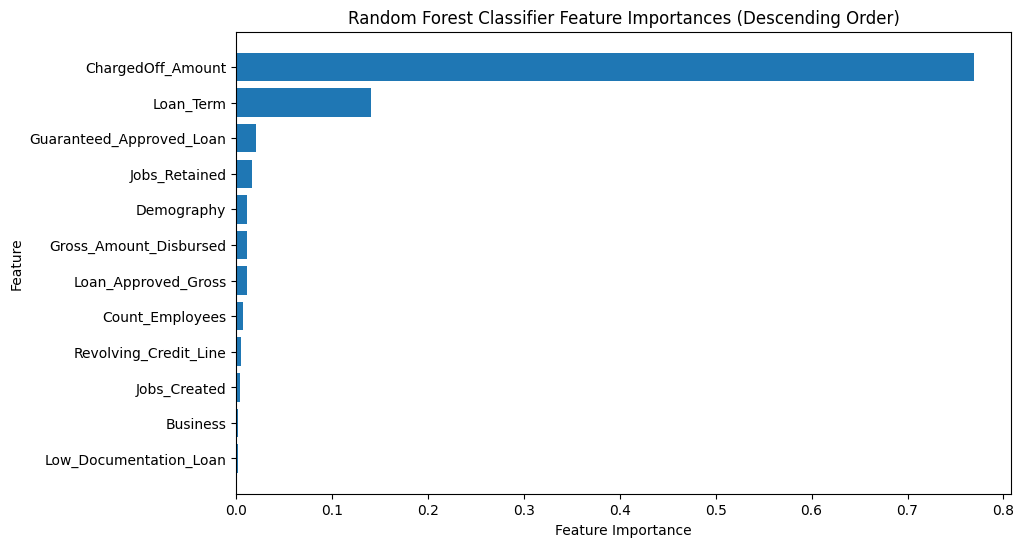

In [76]:
# Get feature importances
feature_importances = rf_model_entropy.feature_importances_

# Create a dictionary mapping feature names to their importance scores
feature_importance_dict = dict(zip(xtrain.columns, feature_importances))

# Sort the dictionary by importance scores in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract feature names and importances
features = [feat for feat, _ in sorted_feature_importance]
importances = [imp for _, imp in sorted_feature_importance]

# Plotting the feature importances in descending order
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Classifier Feature Importances (Descending Order)')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()

<b>Recursive Feature Elimination</b> To find the significant features

In [77]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=4)

rfe = RFE(estimator=rf_classifier, n_features_to_select=5)

rfe.fit(xtrain, ytrain)

selected_features_mask = rfe.support_

significant_variables = xtrain.columns[selected_features_mask]

print("Significant Variables:")
print(significant_variables)

Significant Variables:
Index(['Jobs_Retained', 'Guaranteed_Approved_Loan', 'ChargedOff_Amount',
       'Loan_Approved_Gross', 'Loan_Term'],
      dtype='object')


<b>Random Forest with the rfe significant features</b>

In [78]:
rfe_sig_columns = ['Jobs_Retained', 'Guaranteed_Approved_Loan', 'ChargedOff_Amount','Loan_Approved_Gross', 'Loan_Term']

- Build the model:

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators =100,criterion='entropy',random_state=4)
rf_model_entropy_rfe = rf.fit(xtrain[rfe_sig_columns],ytrain)
ypred_rf_entropy_test_rfe = rf_model_entropy_rfe.predict(xtest[rfe_sig_columns])
ypred_rf_entropy_train_rfe = rf_model_entropy_rfe.predict(xtrain[rfe_sig_columns])

- Model performance evaluation:

In [82]:
confusion_matrix(ytest,ypred_rf_entropy_test_rfe) 

array([[15066,   113],
       [   20,  5801]], dtype=int64)

In [81]:
confusion_matrix(ytrain,ypred_rf_entropy_train_rfe) 

array([[60712,     5],
       [   23, 23260]], dtype=int64)

<b><u>Inference:</u></b>
- Model performance is slighly poor when using the features suggested by Random forest.

<hr>

## Adaboost:

- Base model for ADAboost:

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators =100,criterion='entropy',random_state=4)
rf_model_entropy = rf.fit(xtrain,ytrain)
ypred_rf_entropy_test = rf_model_entropy.predict(xtest)
ypred_rf_entropy_train = rf_model_entropy.predict(xtrain)

- Build Adaboost model:

In [84]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(estimator=rf_model_entropy,n_estimators=100,random_state=4)
ada_model = ada.fit(xtrain,ytrain)
ypred_ada_test = ada_model.predict(xtest)
ypred_ada_train = ada_model.predict(xtrain)

- Model performance evaluation:

In [85]:
confusion_matrix(ytest,ypred_ada_test) 

array([[15070,   109],
       [   34,  5787]], dtype=int64)

In [86]:
confusion_matrix(ytrain,ypred_ada_train) 

array([[60717,     0],
       [    7, 23276]], dtype=int64)

- Update model performance:

In [91]:
update_performance("Adaboost - Test", ada_model, ytest, ypred_ada_test)

In [92]:
update_performance("Adaboost - Train", ada_model, ytrain, ypred_ada_train)

In [93]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score,TN,FN,FP,TP
0,Logistic Regression [Base model] - Test,0.984190,0.984190,0.984182,0.984130,15084,237,95,5584
1,Logistic Regression [Base model] - Train,0.984393,0.984393,0.984381,0.984336,60330,924,387,22359
2,Logistic Regression [VIF columns] - Test,0.980190,0.980190,0.980299,0.980045,15104,341,75,5480
3,Logistic Regression [VIF columns] - Train,0.979881,0.979881,0.979973,0.979737,60391,1364,326,21919
4,Logistic Regression [Significant columns] - Test,0.984190,0.984190,0.984182,0.984130,15084,237,95,5584
5,Logistic Regression [Significant columns] - Train,0.984393,0.984393,0.984381,0.984336,60330,924,387,22359
6,Logistic Regression [Transformed data] - Test,0.993905,0.993905,0.993984,0.993920,15068,17,111,5804
7,Logistic Regression [Transformed data] - Train,0.994036,0.994036,0.994087,0.994047,60323,107,394,23176
8,Decision Tree [normal data & hyper-parameter t...,0.993905,0.993905,0.993984,0.993920,15068,17,111,5804
9,Decision Tree [normal data & hyper-parameter t...,0.994048,0.994048,0.994098,0.994059,60324,107,393,23176


<b><u>Inference:</u></b>
- Model performance is very slightly poor compared to Random forest.

## Gradient Boosting:

- Build the model:

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100,random_state=4)
gb_model = gb.fit(xtrain,ytrain)
ypred_gb_test = gb_model.predict(xtest)
ypred_gb_train = gb_model.predict(xtrain)

- Model performance evaluation:

In [95]:
confusion_matrix(ytest,ypred_gb_test) 

array([[15068,   111],
       [   27,  5794]], dtype=int64)

In [96]:
confusion_matrix(ytrain,ypred_gb_train) 

array([[60359,   358],
       [  104, 23179]], dtype=int64)

In [97]:
update_performance("Gradientboost - Test", gb_model, ytest, ypred_gb_test)
update_performance("Gradientboost - Train", gb_model, ytrain, ypred_gb_train)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score,TN,FN,FP,TP
0,Logistic Regression [Base model] - Test,0.984190,0.984190,0.984182,0.984130,15084,237,95,5584
1,Logistic Regression [Base model] - Train,0.984393,0.984393,0.984381,0.984336,60330,924,387,22359
2,Logistic Regression [VIF columns] - Test,0.980190,0.980190,0.980299,0.980045,15104,341,75,5480
3,Logistic Regression [VIF columns] - Train,0.979881,0.979881,0.979973,0.979737,60391,1364,326,21919
4,Logistic Regression [Significant columns] - Test,0.984190,0.984190,0.984182,0.984130,15084,237,95,5584
5,Logistic Regression [Significant columns] - Train,0.984393,0.984393,0.984381,0.984336,60330,924,387,22359
6,Logistic Regression [Transformed data] - Test,0.993905,0.993905,0.993984,0.993920,15068,17,111,5804
7,Logistic Regression [Transformed data] - Train,0.994036,0.994036,0.994087,0.994047,60323,107,394,23176
8,Decision Tree [normal data & hyper-parameter t...,0.993905,0.993905,0.993984,0.993920,15068,17,111,5804
9,Decision Tree [normal data & hyper-parameter t...,0.994048,0.994048,0.994098,0.994059,60324,107,393,23176


<b><u>Inference:</u></b>
- Model performance is slighly higher compared to Adaboost &  slightly poorer compared to Adaboost.

## Extreme Gradient Boosting:

In [101]:
xgb = XGBClassifier(n_estimators=100,random_state=4)
xgb_model = xgb.fit(xtrain,ytrain)
ypred_xgb_test = xgb_model.predict(xtest)
ypred_xgb_train = xgb_model.predict(xtrain)

- Model performance evaluation:

In [102]:
confusion_matrix(ytest,ypred_xgb_test) 

array([[15071,   108],
       [   33,  5788]], dtype=int64)

In [103]:
confusion_matrix(ytrain,ypred_xgb_train) 

array([[60379,   338],
       [  153, 23130]], dtype=int64)

- Update model performance:

In [104]:
update_performance("XGboost - Test", xgb_model, ytest, ypred_xgb_test)
update_performance("XGboost - Train", xgb_model, ytrain, ypred_xgb_train)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score,TN,FN,FP,TP
0,Logistic Regression [Base model] - Test,0.984190,0.984190,0.984182,0.984130,15084,237,95,5584
1,Logistic Regression [Base model] - Train,0.984393,0.984393,0.984381,0.984336,60330,924,387,22359
2,Logistic Regression [VIF columns] - Test,0.980190,0.980190,0.980299,0.980045,15104,341,75,5480
3,Logistic Regression [VIF columns] - Train,0.979881,0.979881,0.979973,0.979737,60391,1364,326,21919
4,Logistic Regression [Significant columns] - Test,0.984190,0.984190,0.984182,0.984130,15084,237,95,5584
5,Logistic Regression [Significant columns] - Train,0.984393,0.984393,0.984381,0.984336,60330,924,387,22359
6,Logistic Regression [Transformed data] - Test,0.993905,0.993905,0.993984,0.993920,15068,17,111,5804
7,Logistic Regression [Transformed data] - Train,0.994036,0.994036,0.994087,0.994047,60323,107,394,23176
8,Decision Tree [normal data & hyper-parameter t...,0.993905,0.993905,0.993984,0.993920,15068,17,111,5804
9,Decision Tree [normal data & hyper-parameter t...,0.994048,0.994048,0.994098,0.994059,60324,107,393,23176


<b><u>Infernece:</b></u>
- Model performance is close to Adaboost's predictive power.